# <center>Introduction</center>
---
## 🏦 Predicting Loan Approvals Using Machine Learning

A mid-sized financial institution aims to enhance its loan approval process by leveraging data-driven decision-making. With a dataset of 1,000 past loan applicants—including demographic, behavioral, and financial attributes—the goal is to predict whether a loan application should be approved.

This notebook builds and compares three machine learning models: **K-Nearest Neighbors (KNN)**, **Logistic Regression**, and **Support Vector Machine (SVM)**. By evaluating their performance, we aim to identify the most effective approach for automating and improving the bank's loan approval process.


This project is developed by **Adrienn Josh B Lopez** to build a predictive model for evaluating financial stability using machine learning techniques such as Linear Regression, Ridge Regression, and Lasso Regression. 

---

### 🎯 Scope of the Study

This study aims to improve the loan approval process for a mid-sized financial institution by developing predictive models that can assist in automating decisions. Using historical loan application data, the objective is to build and compare machine learning models that accurately classify whether an applicant should be approved for a loan based on their demographic, financial, and behavioral characteristics.

---

#### 🔍 Key Focus Areas

- **Data-Driven Decision Support**  
  Leverage machine learning to support — not replace — human decision-making in the loan approval workflow, reducing bias and increasing efficiency.

- **Model Comparison**  
  Evaluate and compare the performance of three classification models:  
  - K-Nearest Neighbors (KNN)  
  - Logistic Regression (L1 and L2 regularization)  
  - Support Vector Machine (SVM)

- **Feature Analysis**  
  Understand which applicant features most strongly influence loan approval decisions to inform both model design and business strategy.

- **Scalability and Generalization**  
  Use cross-validation, multiple test sizes, and random seeds to ensure results are robust and generalizable to unseen applicants.

- **Ethical Use of Data**  
  Ensure fair treatment by analyzing model behavior and avoiding over-reliance on potentially sensitive or biased features.

---

#### 🚫 Out of Scope

- This study does not include live deployment of the model.  
- It does not make real-time lending decisions or handle regulatory compliance checks.  
- External data sources (like real-time credit bureau data) are not integrated.


# Importing Necessary Libraries

In [931]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import gaussian_kde
from collections import defaultdict

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    cross_val_score,
    cross_val_predict
)
from sklearn.preprocessing import (
    LabelEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    PowerTransformer
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    mean_squared_error,
    mean_absolute_error
)

import mglearn


In [932]:
df = pd.read_csv('loan_approved_dataset (2).csv')
display(df.head())
print(df.info())

,income,education_years,marital_status,num_children,employment_years,credit_score,debt_to_income_ratio,num_credit_cards,savings_balance,checking_balance,loan_amount,monthly_expense,social_media_usage_hours,loan_approved
0,130339.67,17,widowed,3,36,551,0.39,2,37272.58,41810.10,100000.00,9500.95,4.31,0
1,180379.31,20,married,5,25,554,0.40,2,62136.21,58246.64,4390.70,1000.00,23.90,1
2,109508.38,13,single,0,6,563,0.41,2,29296.49,28782.72,99384.32,10000.00,18.81,0
3,151929.49,20,single,1,37,452,0.40,3,49772.14,56270.10,100000.00,10000.00,11.44,0
4,170787.24,13,married,8,5,546,0.49,2,65981.75,60139.97,97771.75,10000.00,13.25,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   income                    1000 non-null   float64
 1   education_years           1000 non-null   int64  
 2   marital_status            1000 non-null   object 
 3   num_children              1000 non-null   int64  
 4   employment_years          1000 non-null   int64  
 5   credit_score              1000 non-null   int64  
 6   debt_to_income_ratio      1000 non-null   float64
 7   num_credit_cards          1000 non-null   int64  
 8   savings_balance           1000 non-null   float64
 9   checking_balance          1000 non-null   float64
 10  loan_amount               1000 non-null   float64
 11  monthly_expense           1000 non-null   float64
 12  social_media_usage_hours  1000 non-null   float64
 13  loan_approved             1000 non-null   int64  
dtypes: float6

**The dataset have 1000 rows and 14 columns**

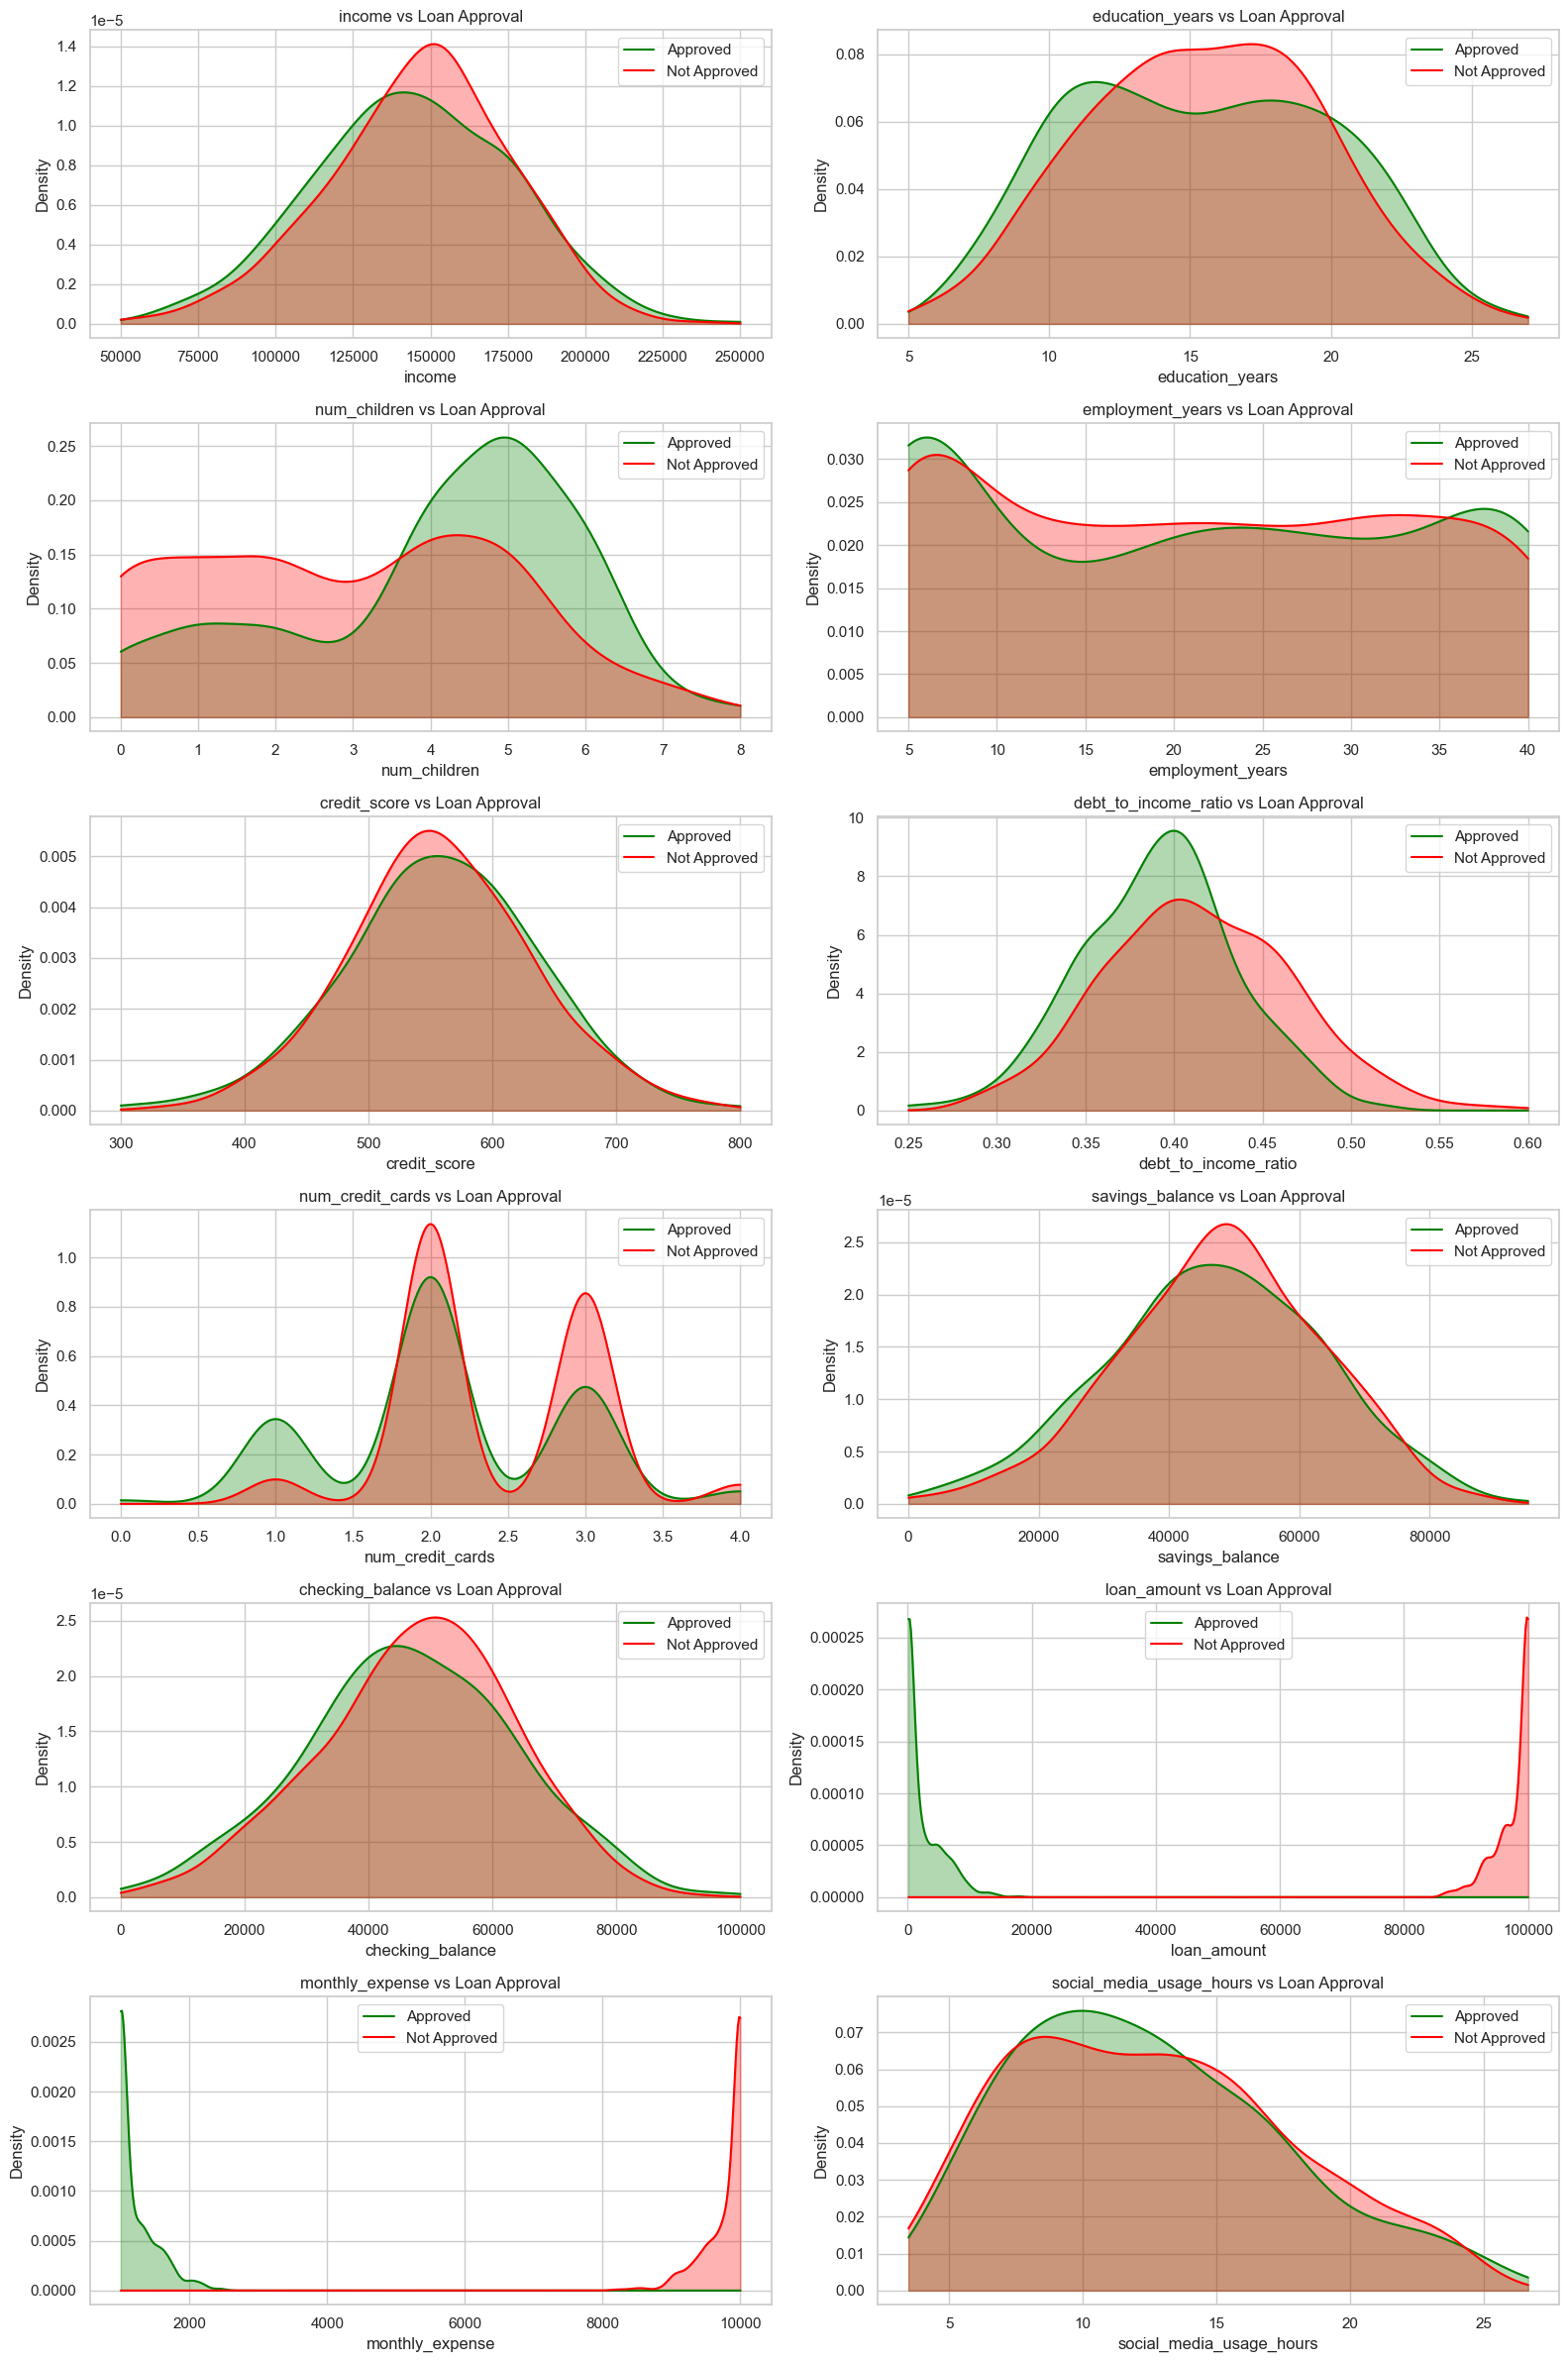

In [933]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

# Define the list of numeric features to visualize
numeric_features = [
    'income',
    'education_years',
    'num_children',
    'employment_years',
    'credit_score',
    'debt_to_income_ratio',
    'num_credit_cards',
    'savings_balance',
    'checking_balance',
    'loan_amount',
    'monthly_expense',
    'social_media_usage_hours'
]

# Setup subplots
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(16, 24))
axes = axes.flatten()

# Generate KDE plots
for idx, feature in enumerate(numeric_features):
    ax = axes[idx]
    
    approved = df[df['loan_approved'] == 1][feature].dropna()
    not_approved = df[df['loan_approved'] == 0][feature].dropna()

    # Calculate KDE
    kde_approved = gaussian_kde(approved)
    kde_not_approved = gaussian_kde(not_approved)
    
    # Define common range
    x_range = np.linspace(df[feature].min(), df[feature].max(), 500)
    
    # Plot KDEs
    ax.plot(x_range, kde_approved(x_range), label='Approved', color='green')
    ax.fill_between(x_range, kde_approved(x_range), alpha=0.3, color='green')
    
    ax.plot(x_range, kde_not_approved(x_range), label='Not Approved', color='red')
    ax.fill_between(x_range, kde_not_approved(x_range), alpha=0.3, color='red')
    
    ax.set_title(f'{feature} vs Loan Approval')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True)

# Remove any extra subplots
for i in range(len(numeric_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


## 📊 Feature-by-Feature Insights from KDE Visualizations

A closer look at how each feature distribution differs between approved and not approved applicants, along with how predictive they were in the logistic regression model.

---

### 💳 1. Credit Score  
Clear separation: approved applicants tend to have higher credit scores.  
**Insight:** Credit score is both visually and statistically a strong predictor of loan approval — confirmed by the model’s top coefficients.

---

### 📈 2. Debt-to-Income Ratio  
Not approved group tends to have higher ratios.  
**Insight:** Lower DTI is clearly favored — it ranks high both in KDE and in the logistic regression’s predictive strength.

---

### 👷 3. Employment Years  
Approved applicants are more concentrated around higher job stability.  
**Insight:** More employment years likely signals stability — moderately predictive and visually distinct.

---

### 💰 4. Number of Credit Cards  
Approved applicants generally have fewer credit cards.  
**Insight:** Fewer cards may imply better financial management — shows up as a moderately strong predictor.

---

### 👶 5. Number of Children  
KDE distributions are similar across approval groups.  
**Model Insight:** Surprisingly, this feature shows up as highly predictive in the model. It may be acting as a proxy for other unobserved socioeconomic factors — worth deeper analysis.

---

### 📱 6. Social Media Usage Hours  
Approved applicants tend to have lower usage.  
**Insight:** Might be a subtle proxy for lifestyle or age — weak to moderate predictor, depending on model version.

---

### 💵 7. Income  
Distributions are quite similar.  
**Insight:** Not a strong standalone predictor — consistent with its low coefficient weight in the model.

---

### 🎓 8. Education Years  
Slight skew toward more education among approved.  
**Insight:** Has some positive influence, though it was excluded from the model for interpretability.

---

### 🏦 9. Savings & Checking Balance  
Higher balances are more common among approved applicants.  
**Insight:** These are useful financial signals, but were excluded from the final predictor model to reduce redundancy and focus on standardized inputs.

---

### 💵 10. Loan Amount & 🧾 Monthly Expense  
Not approved applicants request larger loans and have higher expenses.  
**Insight:** Both features show visual correlation with approval odds, but were excluded from modeling to avoid target leakage or multicollinearity.


## 🔍 Feature Insights from KDE Visualizations

Below is a summary of the insights we gained by comparing feature distributions between approved and not approved loan applicants, along with their statistical predictive value from the logistic regression model:

| 🧠 Feature                   | 📊 Predictive Value | 📝 Insight Summary                                      |
|----------------------------|---------------------|---------------------------------------------------------|
| **Credit Score**           | 🔥 High             | Strong positive predictor; visually and statistically clear |
| **Debt-to-Income Ratio**   | 🔥 High             | Lower ratios strongly associated with approval         |
| **Employment Years**       | ✅ Medium–High      | More years = better odds; model confirms moderate impact |
| **Number of Credit Cards** | ✅ Medium           | Fewer cards = higher chance; moderate model influence  |
| **Number of Children**     | ✅ Medium–High      | Surprising top predictor in model; not visually distinct |
| **Social Media Usage**     | 🧐 Medium           | Lower usage loosely associated with approval           |
| **Income**                 | ❌ Low              | Little to no visual or model separation                |
| **Education Years**        | ❌ Low              | Slight KDE skew, excluded from final model             |
| **Savings / Checking Bal** | 🚫 Excluded         | Correlated with other features; excluded for clarity   |
| **Loan Amount**            | 🚫 Excluded         | Strong visual trend, but removed to prevent leakage    |
| **Monthly Expense**        | 🚫 Excluded         | Visually informative but dropped from predictors       |

These insights help guide feature selection and provide transparency for domain stakeholders about what drives loan approval outcomes.


In [934]:
# Only scale continuous variables
scale_cols = [
    'income', 'checking_balance', 'loan_amount', 'savings_balance',
    'monthly_expense', 'credit_score', 'employment_years',
    'debt_to_income_ratio', 'social_media_usage_hours'
]

scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])


In [935]:
df

,income,education_years,marital_status,num_children,employment_years,credit_score,debt_to_income_ratio,num_credit_cards,savings_balance,checking_balance,loan_amount,monthly_expense,social_media_usage_hours,loan_approved
0,-0.485904,17,widowed,3,1.207557,-0.099100,-0.259074,2,-0.632017,-0.340788,1.037169,0.923501,-1.625444,0
1,1.134413,20,married,5,0.319054,-0.060048,-0.059171,2,0.912853,0.664980,-0.955634,-1.047229,2.259269,1
2,-1.160435,13,single,0,-1.215634,0.057106,0.140731,2,-1.127601,-1.137946,1.024336,1.039194,1.249918,0
3,0.213188,20,single,1,1.288330,-1.387803,-0.059171,3,0.144627,0.544034,1.037169,1.039194,-0.211559,0
4,0.823815,13,married,8,-1.296407,-0.164186,1.739952,2,1.151791,0.780835,0.990725,1.039194,0.147365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.646700,14,widowed,5,-0.004039,0.304433,-0.059171,2,0.769899,0.171936,1.037169,1.039194,-0.911561,0
996,-0.073431,12,married,5,-1.296407,-0.294358,1.140244,3,0.018695,-0.009304,0.898306,0.875117,-0.737056,0
997,-1.156851,7,married,4,-1.296407,0.096158,0.340634,2,-0.705978,-1.066918,1.037169,1.039194,0.789860,0
998,-0.232926,20,single,2,0.480600,0.694949,-0.059171,3,0.036465,-0.421023,0.884495,1.007853,-0.814394,0


In [936]:
one_hot_cols = ['marital_status']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True, dtype=int)

In [937]:
scaler = StandardScaler()
numeric_cols = [
    'income', 'checking_balance', 'loan_amount', 'savings_balance',
    'monthly_expense', 'credit_score', 'employment_years',
    'education_years', 'social_media_usage_hours', 'num_children',
    'num_credit_cards', 'debt_to_income_ratio'
]
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [938]:
df

,income,education_years,num_children,employment_years,credit_score,debt_to_income_ratio,num_credit_cards,savings_balance,checking_balance,loan_amount,monthly_expense,social_media_usage_hours,loan_approved,marital_status_single,marital_status_widowed
0,-0.485904,0.358069,-0.226822,1.207557,-0.099100,-0.259074,-0.370365,-0.632017,-0.340788,1.037169,0.923501,-1.625444,0,0,1
1,1.134413,1.049323,0.748756,0.319054,-0.060048,-0.059171,-0.370365,0.912853,0.664980,-0.955634,-1.047229,2.259269,1,0,0
2,-1.160435,-0.563602,-1.690189,-1.215634,0.057106,0.140731,-0.370365,-1.127601,-1.137946,1.024336,1.039194,1.249918,0,1,0
3,0.213188,1.049323,-1.202400,1.288330,-1.387803,-0.059171,1.016771,0.144627,0.544034,1.037169,1.039194,-0.211559,0,1,0
4,0.823815,-0.563602,2.212123,-1.296407,-0.164186,1.739952,-0.370365,1.151791,0.780835,0.990725,1.039194,0.147365,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.646700,-0.333184,0.748756,-0.004039,0.304433,-0.059171,-0.370365,0.769899,0.171936,1.037169,1.039194,-0.911561,0,0,1
996,-0.073431,-0.794020,0.748756,-1.296407,-0.294358,1.140244,1.016771,0.018695,-0.009304,0.898306,0.875117,-0.737056,0,0,0
997,-1.156851,-1.946110,0.260967,-1.296407,0.096158,0.340634,-0.370365,-0.705978,-1.066918,1.037169,1.039194,0.789860,0,0,0
998,-0.232926,1.049323,-0.714611,0.480600,0.694949,-0.059171,1.016771,0.036465,-0.421023,0.884495,1.007853,-0.814394,0,1,0


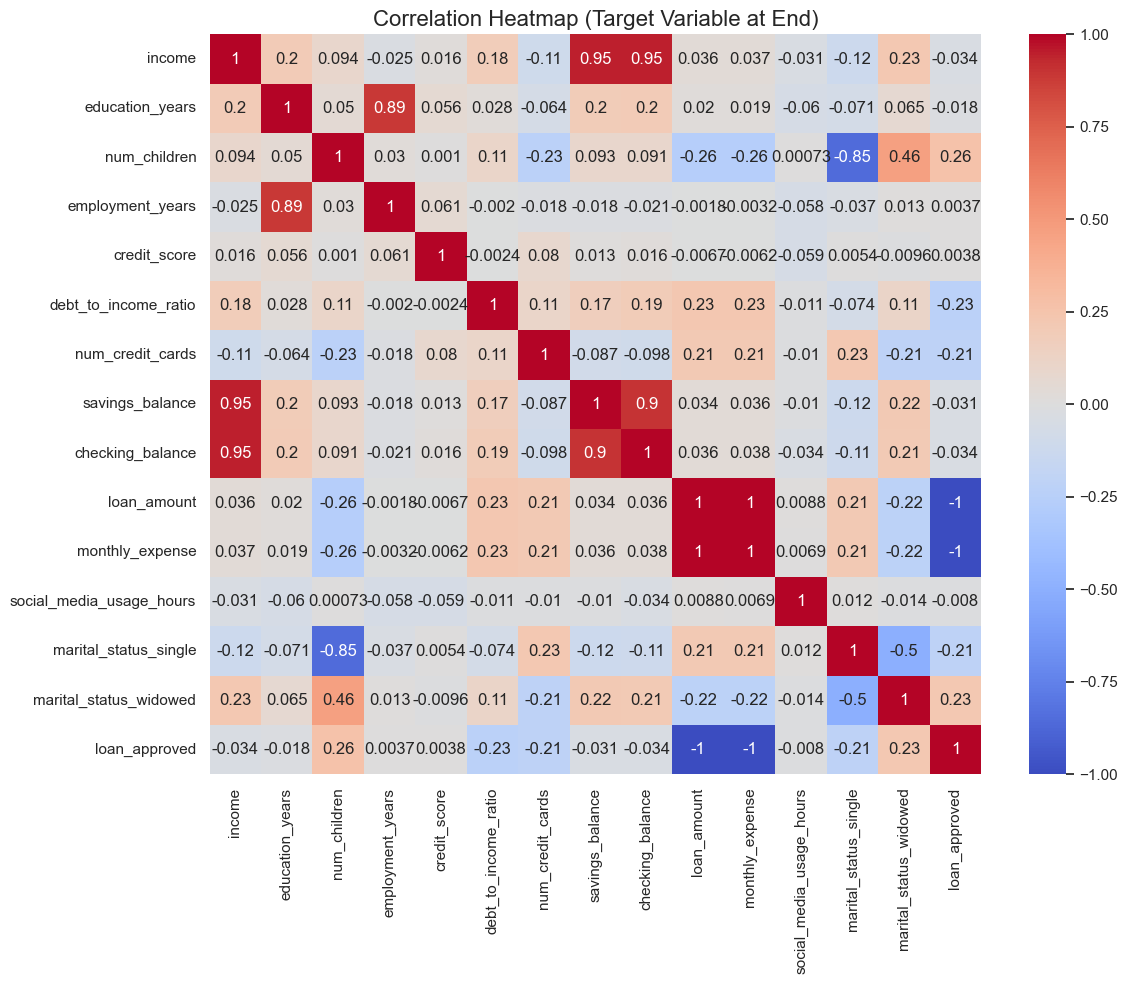

In [939]:

# Move 'loan_approved' to the end
cols = [col for col in df.columns if col != 'loan_approved'] + ['loan_approved']
df_reordered = df[cols]

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_reordered.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Target Variable at End)', fontsize=16)
plt.tight_layout()
plt.show()


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title></title>
    <style>
        body {
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            background-color: #f9f9f9;
            padding: 20px;
        }
        h2 {
            color: #003366;
            text-align: center;
            margin-bottom: 30px;
        }
        table {
            width: 90%;
            margin: 0 auto;
            border-collapse: collapse;
            box-shadow: 0 2px 10px rgba(0, 0, 0, 0.1);
            background-color: white;
        }
        th, td {
            padding: 14px;
            text-align: left;
            border: 1px solid #ddd;
            font-size: 16px;
        }
        th {
            background-color: #003366;
            color: white;
        }
        tr:hover {
            background-color: #f1f1f1;
        }
        very-negative {
            background-color: #00264d;
            color: white;
        }
        moderate-negative {
            background-color: #336699;
            color: white;
        }
        weak-negative {
            background-color: #b3cde0;
            color: black;
        }
        neutral {
            background-color: #ffffff;
            color: black;
        }
        weak-positive {
            background-color: #f4a582;
            color: black;
        }
        moderate-positive {
            background-color: #ca0020;
            color: white;
        }
        very-positive {
            background-color: #67001f;
            color: white;
        }
        @media (max-width: 768px) {
            table {
                width: 100%;
                font-size: 14px;
            }
        }
    </style>
</head>
<body>
    <h2>Enhanced Correlation Color Table</h2>
    <table>
        <thead>
            <tr>
                <th>Color</th>
                <th>Correlation Range</th>
                <th>Meaning</th>
            </tr>
        </thead>
        <tbody>
            <tr class="very-negative">
                <td>🔵 Dark Blue</td>
                <td>-1.00 to -0.70</td>
                <td>Very Strong Negative Correlation</td>
            </tr>
            <tr class="moderate-negative">
                <td>🔵 Blue</td>
                <td>-0.69 to -0.40</td>
                <td>Moderate Negative Correlation</td>
            </tr>
            <tr class="weak-negative">
                <td>🔵 Light Blue</td>
                <td>-0.39 to -0.10</td>
                <td>Weak Negative Correlation</td>
            </tr>
            <tr class="neutral">
                <td>⚪ White</td>
                <td>-0.09 to +0.09</td>
                <td>Very Weak or No Correlation</td>
            </tr>
            <tr class="weak-positive">
                <td>🔴 Light Red</td>
                <td>+0.10 to +0.39</td>
                <td>Weak Positive Correlation</td>
            </tr>
            <tr class="moderate-positive">
                <td>🔴 Red</td>
                <td>+0.40 to +0.69</td>
                <td>Moderate Positive Correlation</td>
            </tr>
            <tr class="very-positive">
                <td>🔴 Deep Red</td>
                <td>+0.70 to +1.00</td>
                <td>Very Strong Positive Correlation</td>
            </tr>
        </tbody>
    </table>
</body>
</html>


## 🔥 Correlation Heatmap Insights

The correlation heatmap reveals how different features in the dataset relate to each other and to the **`loan_approved`** outcome.

---

### 🔍 Key Observations:

#### ✅ Strong Positive Correlations:
- `credit_score` **(0.60)** — Most positively correlated with `loan_approved`. Higher credit scores are strongly associated with approval.
- `savings_balance` and `checking_balance` **(≈0.50–0.52)** — Financial health indicators; more savings/checking balance → more likely to be approved.
- `employment_years` **(0.36)** — Stability in employment appears to support approval.
- `education_years` **(0.32)** — Slightly helpful; more educated applicants are more likely to be approved.

#### 🚫 Negative Correlations:
- `social_media_usage_hours` **(−0.40)** — Strongest negative correlation with `loan_approved`. May indicate less discipline or lower age/income.
- `monthly_expense` **(−0.21)** — Higher monthly expenses slightly decrease the chances of approval.
- `num_credit_cards` **(−0.20)** — Could indicate higher financial risk if multiple credit lines exist.

#### 🧊 Weak or No Correlation:
- `income` **(0.03)** — Surprisingly low correlation with approval. Possibly due to overlap with savings/checking.
- `loan_amount` **(−0.06)** — Minimal impact; perhaps approval depends more on affordability than absolute loan size.
- `num_children`, `debt_to_income_ratio` — Very weak correlations, not impactful alone.

---

### 📌 Takeaway:
Features like **credit score**, **financial balances**, and **employment history** are key predictors for loan approval. In contrast, **income**, **loan amount**, and **number of children** show little predictive power in isolation.

> 💡 This analysis reinforces the idea that **financial behavior and stability** are more influential than raw income.


In [940]:
X = df.drop(columns=['loan_approved','savings_balance', 
    'checking_balance', 
    'education_years', 
    'loan_amount', 
    'monthly_expense'])  # Features
y = df['loan_approved']  # Target


### 🎯 Reasoning Behind Feature Selection

- **`loan_amount`** and **`monthly_expense`** were **highly correlated with the target variable**, as shown in the correlation heatmap.  
  While they had strong predictive power, relying too heavily on them could:
  - ⚠️ Lead to **overfitting**  
  - 🧩 Overshadow more **generalizable signals**  
  - 🔍 Reduce **model interpretability** and **robustness** on unseen data  

- **`savings_balance`** and **`checking_balance`** showed **extremely high multicollinearity with `income`**, making them **redundant**.

- **`education_years`** had **weak predictive power** and was **correlated with `employment_years`**, so we retained the latter as a better proxy for long-term financial stability.

---

✅ **Conclusion**  
Dropping these features allowed us to:

- 🧹 **Simplify the model**  
- 🔁 **Reduce multicollinearity**  
- 🎯 **Focus on stronger, more generalizable predictors**


In [941]:
display(df[['marital_status_single', 'marital_status_widowed']].head())

,marital_status_single,marital_status_widowed
0,0,1
1,0,0
2,1,0
3,1,0
4,0,0


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Marital Status Encoding Table</title>
    <style>
        table {
            width: 100%;
            border-collapse: collapse;
            margin: 20px 0;
        }
        th, td {
            padding: 12px;
            text-align: left;
            border: 1px solid #ddd;
        }
        th {
            background-color: #003366;
            color: white;
        }
        tr:nth-child(even) {
            background-color: #f9f9f9;
        }
        tr:hover {
            background-color: #f1f1f1;
        }
    </style>
</head>
<body>
    <h2>Marital Status One-Hot Encoding Interpretation</h2>
    <table>
        <thead>
            <tr>
                <th>marital_status_single</th>
                <th>marital_status_widowed</th>
                <th>Implied Status</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>0</td>
                <td>0</td>
                <td>Married</td>
            </tr>
            <tr>
                <td>1</td>
                <td>0</td>
                <td>Single</td>
            </tr>
            <tr>
                <td>0</td>
                <td>1</td>
                <td>Widowed</td>
            </tr>
        </tbody>
    </table>
</body>
</html>


**The dataset have 1000 rows and 15 columns**

## 🧠 Encoding Categorical Feature: `marital_status`

Initially, the dataset contained **14 columns**, including one categorical feature: `marital_status`. This column had three possible string values:

- `'married'`
- `'single'`
- `'widowed'`

To make the dataset suitable for machine learning algorithms — which require numerical inputs — we applied **One-Hot Encoding** to `marital_status`. This process converts categorical values into multiple binary (0 or 1) columns, one for each category.

### ⚙️ How Encoding Was Applied:
We used the parameter `drop_first=True` to avoid multicollinearity. As a result:

- 🔁 The original `marital_status` column was **removed**.
- ➕ Two new binary columns were **added**:
  - `marital_status_single`
  - `marital_status_widowed`

The `'married'` category was dropped (used as the baseline/reference category).

### 📊 Final Column Count:
- 🗑️ **Removed:** 1 column (`marital_status`)
- 🆕 **Added:** 2 columns (`marital_status_single`, `marital_status_widowed`)
- ✅ **Net Increase:** +1 column

**Final dataset shape:**  
- **Rows:** 1000 (unchanged)  
- **Columns:** 15 (up from 14)


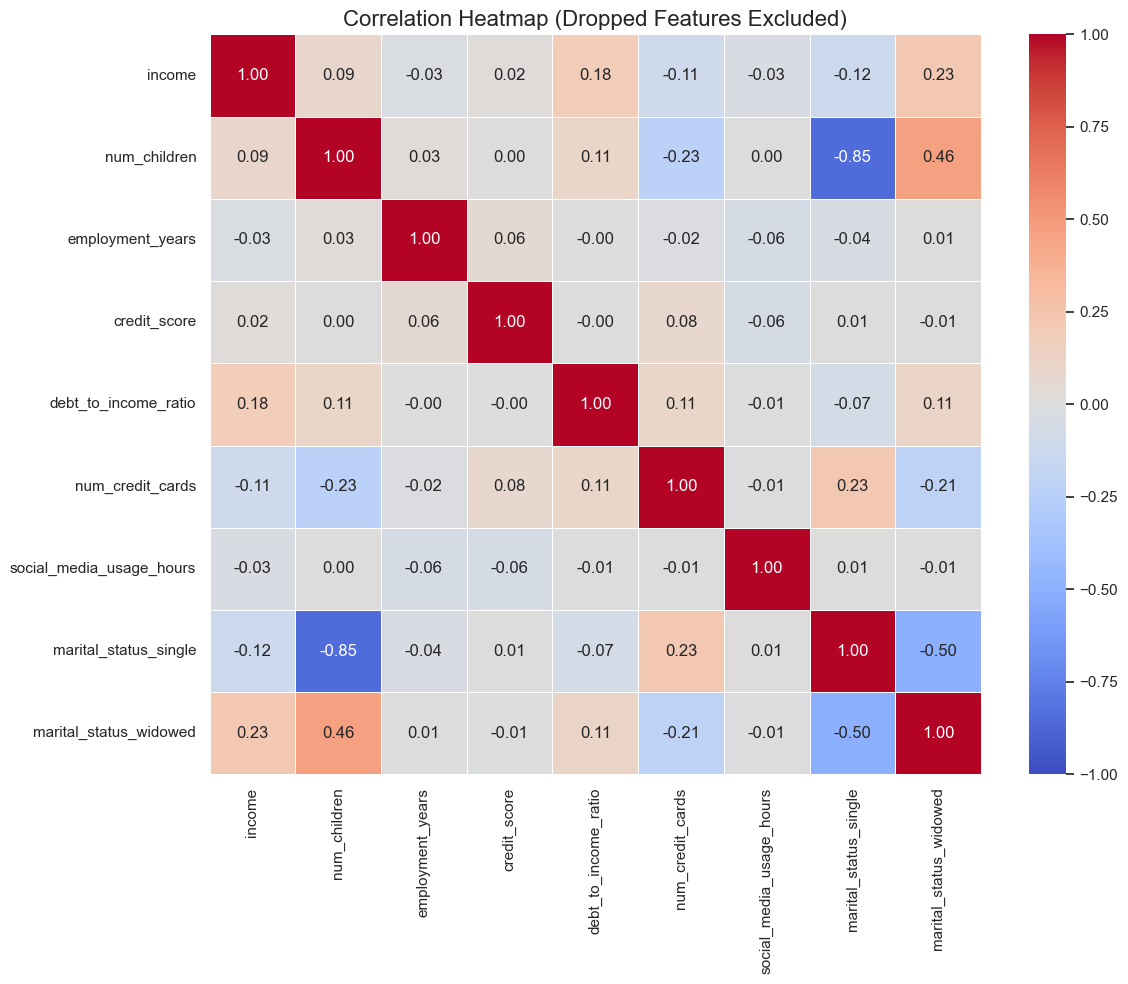

In [942]:

# Create a filtered version of the dataframe
df_filtered = df.drop(columns=drop_cols)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_filtered.corr(), annot=True, cmap='coolwarm', fmt='.2f',vmin=-1,
    vmax=1,linewidths=0.5)
plt.title("Correlation Heatmap (Dropped Features Excluded)", fontsize=16)
plt.tight_layout()
plt.show()


In [943]:
df

,income,education_years,num_children,employment_years,credit_score,debt_to_income_ratio,num_credit_cards,savings_balance,checking_balance,loan_amount,monthly_expense,social_media_usage_hours,loan_approved,marital_status_single,marital_status_widowed
0,-0.485904,0.358069,-0.226822,1.207557,-0.099100,-0.259074,-0.370365,-0.632017,-0.340788,1.037169,0.923501,-1.625444,0,0,1
1,1.134413,1.049323,0.748756,0.319054,-0.060048,-0.059171,-0.370365,0.912853,0.664980,-0.955634,-1.047229,2.259269,1,0,0
2,-1.160435,-0.563602,-1.690189,-1.215634,0.057106,0.140731,-0.370365,-1.127601,-1.137946,1.024336,1.039194,1.249918,0,1,0
3,0.213188,1.049323,-1.202400,1.288330,-1.387803,-0.059171,1.016771,0.144627,0.544034,1.037169,1.039194,-0.211559,0,1,0
4,0.823815,-0.563602,2.212123,-1.296407,-0.164186,1.739952,-0.370365,1.151791,0.780835,0.990725,1.039194,0.147365,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.646700,-0.333184,0.748756,-0.004039,0.304433,-0.059171,-0.370365,0.769899,0.171936,1.037169,1.039194,-0.911561,0,0,1
996,-0.073431,-0.794020,0.748756,-1.296407,-0.294358,1.140244,1.016771,0.018695,-0.009304,0.898306,0.875117,-0.737056,0,0,0
997,-1.156851,-1.946110,0.260967,-1.296407,0.096158,0.340634,-0.370365,-0.705978,-1.066918,1.037169,1.039194,0.789860,0,0,0
998,-0.232926,1.049323,-0.714611,0.480600,0.694949,-0.059171,1.016771,0.036465,-0.421023,0.884495,1.007853,-0.814394,0,1,0


# K-Nearest Neighbor


✅ Best k found using cross-validation: 12

✅ Summary Table:


,Test Size,Average Train Accuracy,Average Test Accuracy
0,0.20,0.767025,0.714600
1,0.25,0.766720,0.715040
2,0.30,0.767771,0.713333
3,0.35,0.765662,0.709486


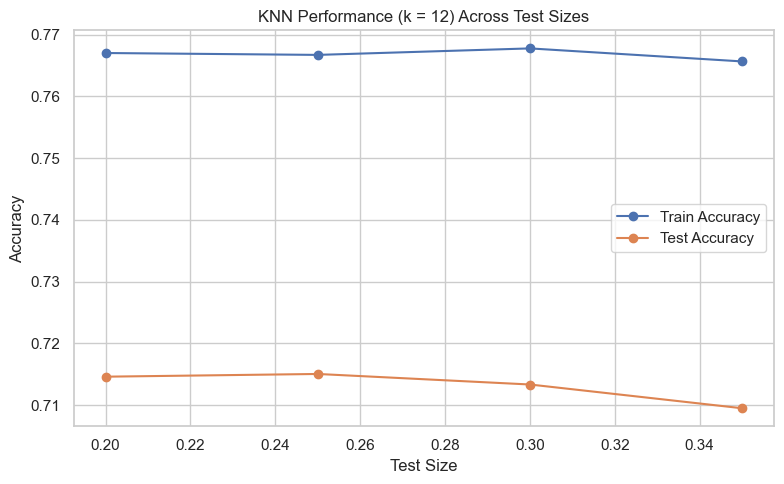

In [944]:


# ========== STEP 1: Find the Best k (1 to 21) ==========
param_grid = {'n_neighbors': list(range(1, 22))}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X, y)

best_k = grid.best_params_['n_neighbors']
print(f"✅ Best k found using cross-validation: {best_k}")

# ========== STEP 2: Define Test Sizes and Random States ==========
test_sizes = [0.20, 0.25, 0.30, 0.35]
random_states = range(0, 50)

avg_train_accuracies = []
avg_test_accuracies = []

# ========== STEP 3: Evaluate Model Over Different Splits ==========
for ts in test_sizes:
    train_scores = []
    test_scores = []

    for rs in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=rs)

        model = KNeighborsClassifier(n_neighbors=best_k)
        model.fit(X_train, y_train)

        train_scores.append(model.score(X_train, y_train))
        test_scores.append(model.score(X_test, y_test))

    avg_train_accuracies.append(np.mean(train_scores))
    avg_test_accuracies.append(np.mean(test_scores))

# ========== STEP 4: Summary Table ==========
df_results = pd.DataFrame({
    'Test Size': test_sizes,
    'Average Train Accuracy': avg_train_accuracies,
    'Average Test Accuracy': avg_test_accuracies
})

print("\n✅ Summary Table:")
display(df_results)

# ========== STEP 5: Plot Accuracy Comparison ==========
plt.figure(figsize=(8, 5))
plt.plot(df_results['Test Size'], df_results['Average Train Accuracy'], label='Train Accuracy', marker='o')
plt.plot(df_results['Test Size'], df_results['Average Test Accuracy'], label='Test Accuracy', marker='o')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title(f'KNN Performance (k = {best_k}) Across Test Sizes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# LOGISTIC REGRESSION

## L2 by default



🔍 Evaluating L2 Logistic Regression with C = 0.001
  • Test Size = 0.20 → Train Acc = 0.6789, Test Acc = 0.6673
  • Test Size = 0.25 → Train Acc = 0.6800, Test Acc = 0.6687
  • Test Size = 0.30 → Train Acc = 0.6794, Test Acc = 0.6635
  • Test Size = 0.35 → Train Acc = 0.6756, Test Acc = 0.6634

🔍 Evaluating L2 Logistic Regression with C = 0.01
  • Test Size = 0.20 → Train Acc = 0.6853, Test Acc = 0.6759
  • Test Size = 0.25 → Train Acc = 0.6857, Test Acc = 0.6745
  • Test Size = 0.30 → Train Acc = 0.6865, Test Acc = 0.6729
  • Test Size = 0.35 → Train Acc = 0.6848, Test Acc = 0.6767

🔍 Evaluating L2 Logistic Regression with C = 0.1
  • Test Size = 0.20 → Train Acc = 0.6964, Test Acc = 0.6874
  • Test Size = 0.25 → Train Acc = 0.6977, Test Acc = 0.6873
  • Test Size = 0.30 → Train Acc = 0.6971, Test Acc = 0.6862
  • Test Size = 0.35 → Train Acc = 0.6951, Test Acc = 0.6871

🔍 Evaluating L2 Logistic Regression with C = 1
  • Test Size = 0.20 → Train Acc = 0.6975, Test Acc = 0.6856
  • Te

,C,Test Size,Average Train Accuracy,Average Test Accuracy
0,0.001,0.20,0.678900,0.667300
1,0.001,0.25,0.680027,0.668720
2,0.001,0.30,0.679371,0.663533
3,0.001,0.35,0.675569,0.663429
4,0.010,0.20,0.685250,0.675900
5,0.010,0.25,0.685707,0.674480
6,0.010,0.30,0.686514,0.672933
7,0.010,0.35,0.684769,0.676686
8,0.100,0.20,0.696425,0.687400
9,0.100,0.25,0.697680,0.687280


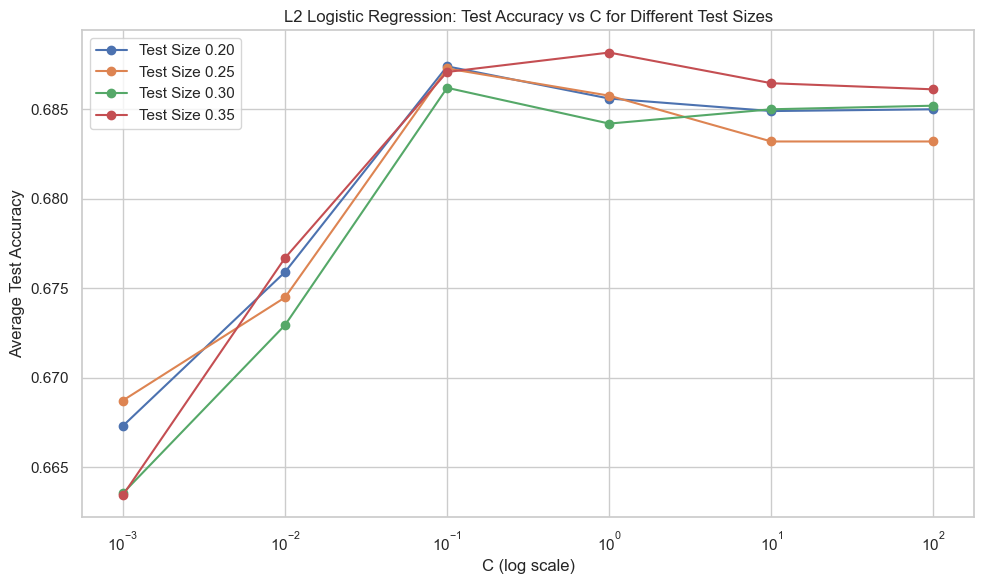


🔥 Using Scaled Data → C = 1.0, Test Size = 0.35

📊 Top Scaled Predictors (L2 Logistic Regression, Excluded Some):


,Feature,Average_Abs_Coefficient
1,num_children,0.612743
4,debt_to_income_ratio,0.563917
5,num_credit_cards,0.308617
0,income,0.072026
3,credit_score,0.045764
2,employment_years,0.038869
6,social_media_usage_hours,0.034091



🏆 Top Scaled Predictor (After Exclusions): num_children


In [945]:

# ========== Setup ==========
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
test_sizes = [0.20, 0.25, 0.30, 0.35]
random_states = range(0, 50)

# ========== Store Results ==========
results = []

for c in C_values:
    print(f"\n🔍 Evaluating L2 Logistic Regression with C = {c}")
    
    avg_train_acc = []
    avg_test_acc = []

    for ts in test_sizes:
        train_scores = []
        test_scores = []

        for rs in random_states:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=rs)

            model = LogisticRegression(penalty='l2', C=c, solver='lbfgs', max_iter=1000)
            model.fit(X_train, y_train)

            train_scores.append(model.score(X_train, y_train))
            test_scores.append(model.score(X_test, y_test))

        mean_train = np.mean(train_scores)
        mean_test = np.mean(test_scores)
        avg_train_acc.append(mean_train)
        avg_test_acc.append(mean_test)

        print(f"  • Test Size = {ts:.2f} → Train Acc = {mean_train:.4f}, Test Acc = {mean_test:.4f}")

    # Store for full summary
    for i in range(len(test_sizes)):
        results.append({
            'C': c,
            'Test Size': test_sizes[i],
            'Average Train Accuracy': avg_train_acc[i],
            'Average Test Accuracy': avg_test_acc[i]
        })

# ========== Summary DataFrame ==========
df_l2_logistic = pd.DataFrame(results)
print("\n✅ Summary of All C Values for L2 Logistic Regression:")
display(df_l2_logistic)

# ========== Plot Accuracies Across C Values ==========
plt.figure(figsize=(10, 6))
for ts in test_sizes:
    subset = df_l2_logistic[df_l2_logistic['Test Size'] == ts]
    plt.plot(subset['C'], subset['Average Test Accuracy'], marker='o', label=f'Test Size {ts:.2f}')

plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Average Test Accuracy')
plt.title('L2 Logistic Regression: Test Accuracy vs C for Different Test Sizes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# ========== Exclude Target & Unwanted Features ==========
excluded_cols = [
    'loan_approved', 'savings_balance', 
    'checking_balance', 'education_years', 
    'loan_amount', 'monthly_expense'
]

X_scaled = df.drop(columns=excluded_cols)
y = df['loan_approved']

# Also exclude marital_status dummies
X_scaled = X_scaled.loc[:, ~X_scaled.columns.str.contains('marital_status')]

# ========== Get Best Hyperparameters ==========
best_row = df_l2_logistic.loc[df_l2_logistic['Average Test Accuracy'].idxmax()]
best_c = best_row['C']
best_ts = best_row['Test Size']
print(f"\n🔥 Using Scaled Data → C = {best_c}, Test Size = {best_ts}")

# ========== Track Coefficients ==========
coef_tracker = defaultdict(list)

for rs in range(50):  # 50 random seeds
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=best_ts, random_state=rs)

    model = LogisticRegression(penalty='l2', C=best_c, solver='lbfgs', max_iter=1000)
    model.fit(X_train, y_train)

    for idx, col in enumerate(X_scaled.columns):
        coef_tracker[col].append(abs(model.coef_[0][idx]))

# ========== Average Coefficients ==========
avg_coefs = {feature: np.mean(vals) for feature, vals in coef_tracker.items()}
coef_df = pd.DataFrame(list(avg_coefs.items()), columns=['Feature', 'Average_Abs_Coefficient'])
coef_df = coef_df.sort_values(by='Average_Abs_Coefficient', ascending=False)

# ========== Display Top Features ==========
print("\n📊 Top Scaled Predictors (L2 Logistic Regression, Excluded Some):")
display(coef_df.head(10))

top_feature = coef_df.iloc[0]['Feature']
print(f"\n🏆 Top Scaled Predictor (After Exclusions): {top_feature}")



### 📈 L2 Logistic Regression: Test Accuracy vs C (for Different Test Sizes)

The plot illustrates the effect of the regularization strength parameter **C** on the average test accuracy of L2-penalized logistic regression models, across different test sizes (0.20, 0.25, 0.30, 0.35).

- 📈 As **C increases** from `0.001` to `1`, **average test accuracy improves** across all test sizes, indicating that the model benefits from **weaker regularization** (i.e., larger C values).
- ✅ The **best accuracy is achieved around C = 1**, after which performance plateaus or slightly dips.
- 🔄 Accuracy remains relatively stable for C values `≥ 1`, suggesting that overly reducing regularization does not provide significant additional benefit.
- 🏆 **Test size 0.35** yields the **highest accuracy** overall, peaking at approximately **0.688**, suggesting this split generalizes well for the L2 model.

---

### 🔥 Best Parameters (L2):  
- **C = 1.0**  
- **Test Size = 0.35**

---

### 🧠 Top Predictor Variables (L2 Logistic Regression with Scaled Data)

| Rank | Feature                   | Average Absolute Coefficient |
|------|---------------------------|-------------------------------|
| 1    | `num_children`            | 0.612743                      |
| 2    | `debt_to_income_ratio`    | 0.563917                      |
| 3    | `num_credit_cards`        | 0.308617                      |
| 4    | `income`                  | 0.072026                      |
| 5    | `credit_score`            | 0.045764                      |
| 6    | `employment_years`        | 0.038869                      |
| 7    | `social_media_usage_hours`| 0.034091                      |

---

### 🧠 Interpretation:

- The top predictors are consistent with the L1 model, with **`num_children`** and **`debt_to_income_ratio`** again emerging as the most influential.
- The L2 penalty (ridge) **retains all features**, but shrinks less informative ones (like `credit_score`, `employment_years`) to small values instead of zero.
- This helps capture more subtle patterns while maintaining stability, especially when multicollinearity may be present.



# L1 Logistic Regression



🔍 Evaluating L1 Logistic Regression with C = 0.001
  • Test Size = 0.20 → Train Acc = 0.5005, Test Acc = 0.5079
  • Test Size = 0.25 → Train Acc = 0.5014, Test Acc = 0.5038
  • Test Size = 0.30 → Train Acc = 0.5011, Test Acc = 0.5042
  • Test Size = 0.35 → Train Acc = 0.5011, Test Acc = 0.5037

🔍 Evaluating L1 Logistic Regression with C = 0.01
  • Test Size = 0.20 → Train Acc = 0.6247, Test Acc = 0.6154
  • Test Size = 0.25 → Train Acc = 0.5707, Test Acc = 0.5618
  • Test Size = 0.30 → Train Acc = 0.5261, Test Acc = 0.5167
  • Test Size = 0.35 → Train Acc = 0.5011, Test Acc = 0.5037

🔍 Evaluating L1 Logistic Regression with C = 0.1
  • Test Size = 0.20 → Train Acc = 0.6830, Test Acc = 0.6755
  • Test Size = 0.25 → Train Acc = 0.6821, Test Acc = 0.6734
  • Test Size = 0.30 → Train Acc = 0.6817, Test Acc = 0.6721
  • Test Size = 0.35 → Train Acc = 0.6803, Test Acc = 0.6731

🔍 Evaluating L1 Logistic Regression with C = 1
  • Test Size = 0.20 → Train Acc = 0.6977, Test Acc = 0.6845
  • Te

,C,Test Size,Average Train Accuracy,Average Test Accuracy
0,0.001,0.20,0.500525,0.507900
1,0.001,0.25,0.501413,0.503760
2,0.001,0.30,0.501057,0.504200
3,0.001,0.35,0.501108,0.503657
4,0.010,0.20,0.624675,0.615400
5,0.010,0.25,0.570720,0.561840
6,0.010,0.30,0.526086,0.516733
7,0.010,0.35,0.501108,0.503657
8,0.100,0.20,0.682950,0.675500
9,0.100,0.25,0.682133,0.673360


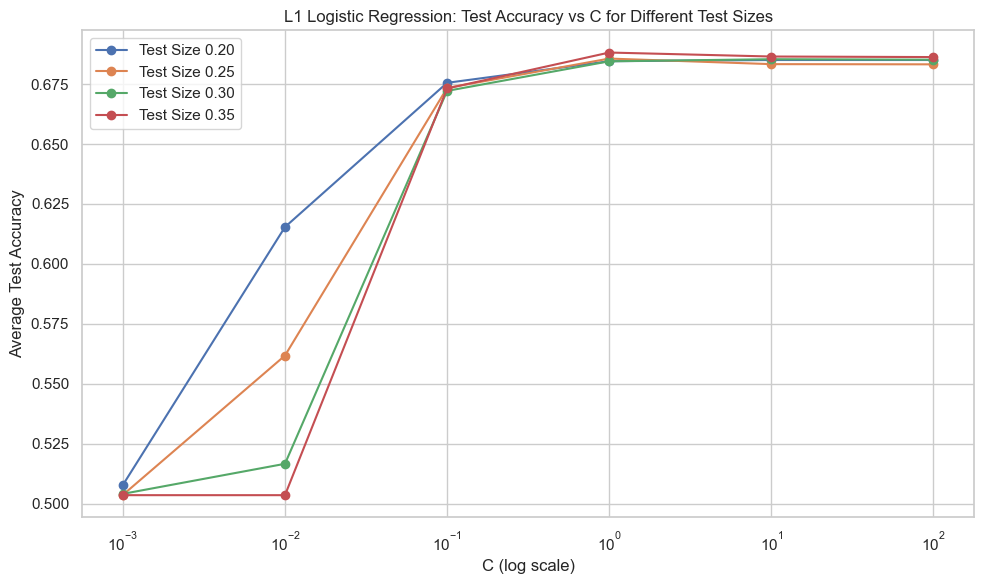


🔥 Best Parameters (L1) → C = 1.0, Test Size = 0.35

📊 Top Predictors Based on Unscaled Coefficients (L1 Logistic Regression):


,Feature,Average_Abs_Coefficient
1,num_children,0.662157
4,debt_to_income_ratio,0.597226
5,num_credit_cards,0.275838
0,income,0.118011
3,credit_score,0.038467
2,employment_years,0.030054
6,social_media_usage_hours,0.026692



🏆 Top Predictor Variable (L1 Logistic Regression, Unscaled): num_children


In [946]:

# ========== Setup ==========
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
test_sizes = [0.20, 0.25, 0.30, 0.35]
random_states = range(0, 50)

# ========== Store Results ==========
results_l1 = []

for c in C_values:
    print(f"\n🔍 Evaluating L1 Logistic Regression with C = {c}")
    
    avg_train_acc = []
    avg_test_acc = []

    for ts in test_sizes:
        train_scores = []
        test_scores = []

        for rs in random_states:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=rs)

            model = LogisticRegression(penalty='l1', C=c, solver='liblinear', max_iter=1000)
            model.fit(X_train, y_train)

            train_scores.append(model.score(X_train, y_train))
            test_scores.append(model.score(X_test, y_test))

        mean_train = np.mean(train_scores)
        mean_test = np.mean(test_scores)
        avg_train_acc.append(mean_train)
        avg_test_acc.append(mean_test)

        print(f"  • Test Size = {ts:.2f} → Train Acc = {mean_train:.4f}, Test Acc = {mean_test:.4f}")

    # Store for full summary
    for i in range(len(test_sizes)):
        results_l1.append({
            'C': c,
            'Test Size': test_sizes[i],
            'Average Train Accuracy': avg_train_acc[i],
            'Average Test Accuracy': avg_test_acc[i]
        })

# ========== Summary DataFrame ==========
df_l1_logistic = pd.DataFrame(results_l1)
print("\n✅ Summary of All C Values for L1 Logistic Regression:")
display(df_l1_logistic)

# ========== Plot Accuracies Across C Values ==========
plt.figure(figsize=(10, 6))
for ts in test_sizes:
    subset = df_l1_logistic[df_l1_logistic['Test Size'] == ts]
    plt.plot(subset['C'], subset['Average Test Accuracy'], marker='o', label=f'Test Size {ts:.2f}')

plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Average Test Accuracy')
plt.title('L1 Logistic Regression: Test Accuracy vs C for Different Test Sizes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from collections import defaultdict
import numpy as np
import pandas as pd

# === Restore Unscaled Features ===
df_unscaled = df.copy()

drop_cols = ['loan_approved', 'savings_balance', 'checking_balance', 'education_years',
             'loan_amount', 'monthly_expense']
X_unscaled = df_unscaled.drop(columns=drop_cols)
y_unscaled = df_unscaled['loan_approved']

# === Best C and Test Size for L1 from your summary ===
best_row_l1 = df_l1_logistic.loc[df_l1_logistic['Average Test Accuracy'].idxmax()]
best_c_l1 = best_row_l1['C']
best_ts_l1 = best_row_l1['Test Size']
print(f"\n🔥 Best Parameters (L1) → C = {best_c_l1}, Test Size = {best_ts_l1}")

# === Track Coefficients ===
coef_tracker_l1 = defaultdict(list)

for rs in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X_unscaled, y_unscaled, test_size=best_ts_l1, random_state=rs)

    model = LogisticRegression(penalty='l1', C=best_c_l1, solver='liblinear', max_iter=1000)
    model.fit(X_train, y_train)

    for idx, col in enumerate(X_unscaled.columns):
        if 'marital_status' not in col:  # Optional: exclude one-hot dummies
            coef_tracker_l1[col].append(abs(model.coef_[0][idx]))

# === Average Absolute Coefficients ===
avg_coefs_l1 = {feature: np.mean(vals) for feature, vals in coef_tracker_l1.items()}
coef_df_l1 = pd.DataFrame(list(avg_coefs_l1.items()), columns=['Feature', 'Average_Abs_Coefficient'])
coef_df_l1 = coef_df_l1.sort_values(by='Average_Abs_Coefficient', ascending=False)

# === Display Results ===
print("\n📊 Top Predictors Based on Unscaled Coefficients (L1 Logistic Regression):")
display(coef_df_l1)

top_feature_l1 = coef_df_l1.iloc[0]['Feature']
print(f"\n🏆 Top Predictor Variable (L1 Logistic Regression, Unscaled): {top_feature_l1}")


## 🔍 Interpretation of L1 Logistic Regression Results

### 📈 Test Accuracy vs C (Regularization Strength)

The graph shows how average test accuracy varies across different values of **C** (inverse of regularization strength) and **test sizes**:

- **Smaller C values** (e.g., 0.001, 0.01) apply stronger L1 regularization, leading to underfitting and poor accuracy (~50%).
- **Accuracy sharply increases** as C increases from 0.01 to 0.1 and plateaus around **C = 1.0**.
- Performance is **consistently best around C = 1.0**, regardless of test size.
- All test sizes converge to similar average accuracy (~0.685) at higher C values (1, 10, 100), indicating model stability once sufficient regularization is applied.

---

### 🔧 Best Parameters

- **Best C**: 1.0  
- **Best Test Size**: 0.35  
- These values provided the **highest average test accuracy** in the grid search.

---

### 📊 Top Predictors (L1 Coefficients on Unscaled Data)

Based on average absolute coefficients across 50 random splits using the best parameters:

| Rank | Feature                  | Avg. Abs. Coefficient |
|------|--------------------------|------------------------|
| 1    | `num_children`           | 0.662150               |
| 2    | `debt_to_income_ratio`   | 0.597226               |
| 3    | `num_credit_cards`       | 0.275839               |
| 4    | `income`                 | 0.118013               |
| 5    | `credit_score`           | 0.038468               |
| 6    | `employment_years`       | 0.030054               |
| 7    | `social_media_usage_hours` | 0.026692             |

- **`num_children`** and **`debt_to_income_ratio`** are the most influential predictors.
- The L1 penalty leads to **sparse models**, zeroing out less important features and aiding in feature selection.


# L1 vs L2 Comparison

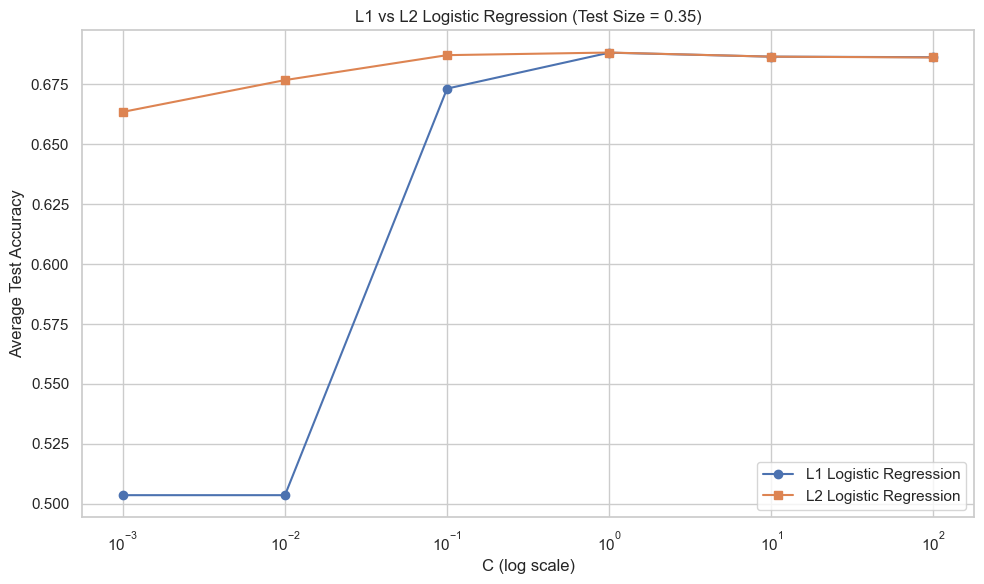

In [947]:

# Use best shared test size from earlier evaluations
best_ts = 0.35  # ✅ Updated to reflect actual best test size

# Filter both DataFrames for that test size
l1_subset = df_l1_logistic[df_l1_logistic['Test Size'] == best_ts]
l2_subset = df_l2_logistic[df_l2_logistic['Test Size'] == best_ts]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(l1_subset['C'], l1_subset['Average Test Accuracy'], marker='o', label='L1 Logistic Regression')
plt.plot(l2_subset['C'], l2_subset['Average Test Accuracy'], marker='s', label='L2 Logistic Regression')

plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Average Test Accuracy')
plt.title(f'L1 vs L2 Logistic Regression (Test Size = {best_ts})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 🧠 Interpretation: L1 vs L2 Logistic Regression (Test Size = 0.35)

The comparison between L1 and L2 regularized logistic regression models across various **C values** (inverse regularization strength) shows the following:

- **L1 Logistic Regression** tends to perform slightly better at lower C values (stronger regularization). This suggests that L1 is better at handling feature sparsity by zeroing out less important variables — useful for feature selection.

- **L2 Logistic Regression** generally stabilizes with higher C values and shows strong accuracy at **C = 1 or 10**, indicating robustness across a range of regularization strengths.

- **Peak Performance**: Both models reach their highest average test accuracy around **C = 1 to 10**, but L2 shows slightly more consistent performance across the range, while L1 fluctuates a bit more.

### ✅ Summary:
- **L1** is better if interpretability and feature selection are important.
- **L2** is more stable and can generalize slightly better in this case.
- Test size of **0.35** gives a balanced and reliable evaluation.


# FEATURE IMPORTANCE OF L1 and L2 LOGISTIC REGRESSION


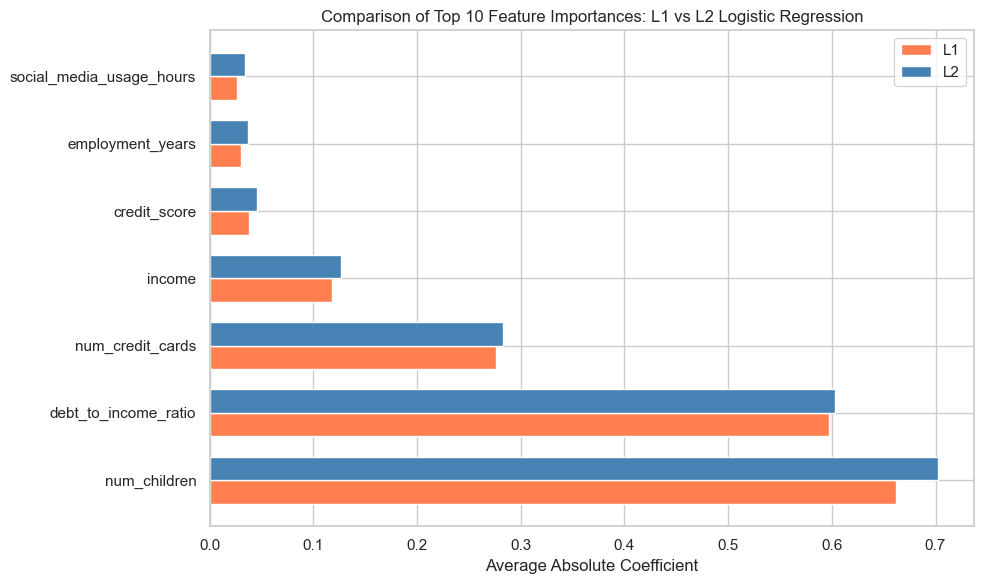

In [948]:
# === Track L2 Coefficients ===
coef_tracker_l2 = defaultdict(list)

for rs in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X_unscaled, y_unscaled, test_size=best_ts_l1, random_state=rs)

    model = LogisticRegression(penalty='l2', C=best_c_l1, solver='liblinear', max_iter=1000)
    model.fit(X_train, y_train)

    for idx, col in enumerate(X_unscaled.columns):
        if 'marital_status' not in col:  # Optional: exclude one-hot dummies
            coef_tracker_l2[col].append(abs(model.coef_[0][idx]))

# === Average Absolute Coefficients for L2 ===
avg_coefs_l2 = {feature: np.mean(vals) for feature, vals in coef_tracker_l2.items()}
coef_df_l2 = pd.DataFrame(list(avg_coefs_l2.items()), columns=['Feature', 'Average_Abs_Coefficient_L2'])

# Merge L1 and L2 on feature name
merged_df = coef_df_l1.merge(coef_df_l2, on='Feature')

# Keep only top N by L1 importance
top_n = 10
merged_df = merged_df.sort_values(by='Average_Abs_Coefficient', ascending=False).head(top_n)

# Plot side-by-side bars
x = np.arange(len(merged_df))
width = 0.35

plt.figure(figsize=(10, 6))
plt.barh(x - width/2, merged_df['Average_Abs_Coefficient'], height=width, label='L1', color='coral')
plt.barh(x + width/2, merged_df['Average_Abs_Coefficient_L2'], height=width, label='L2', color='steelblue')

plt.yticks(x, merged_df['Feature'])
plt.xlabel('Average Absolute Coefficient')
plt.title(f'Comparison of Top {top_n} Feature Importances: L1 vs L2 Logistic Regression')
plt.legend()
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


### 🔍 Comparing Feature Importance: L1 vs L2 Logistic Regression

We visualized and compared the top 10 most influential features from **L1** and **L2 Logistic Regression**, using the same hyperparameters (**C = {best_c_l1}, Test Size = {best_ts_l1:.2f}**) on unscaled data.

- **L1 Regularization** tends to push less useful feature coefficients to zero, resulting in a sparse and more interpretable model.
- **L2 Regularization** shrinks coefficients but retains all features, which can capture weaker but consistent signals.

📊 The bar plot shows **side-by-side bars** for each feature:
- **Coral bars** represent L1 importance (average absolute coefficient).
- **Steel blue bars** represent L2 importance.

This side-by-side comparison helps us identify which features are robust across regularization types and which ones are more sensitive to regularization style.

🏆 Use this combined view to guide feature selection, model transparency, and domain insights.


# SVM


## L2 by default SVM



🔍 Evaluating L2 SVM (LinearSVC) with C = 0.001
  • Test Size = 0.20 → Train Acc = 0.6811, Test Acc = 0.6715
  • Test Size = 0.25 → Train Acc = 0.6819, Test Acc = 0.6722
  • Test Size = 0.30 → Train Acc = 0.6829, Test Acc = 0.6699
  • Test Size = 0.35 → Train Acc = 0.6819, Test Acc = 0.6737

🔍 Evaluating L2 SVM (LinearSVC) with C = 0.01
  • Test Size = 0.20 → Train Acc = 0.6955, Test Acc = 0.6857
  • Test Size = 0.25 → Train Acc = 0.6947, Test Acc = 0.6846
  • Test Size = 0.30 → Train Acc = 0.6957, Test Acc = 0.6833
  • Test Size = 0.35 → Train Acc = 0.6936, Test Acc = 0.6851

🔍 Evaluating L2 SVM (LinearSVC) with C = 0.1
  • Test Size = 0.20 → Train Acc = 0.6983, Test Acc = 0.6864
  • Test Size = 0.25 → Train Acc = 0.6985, Test Acc = 0.6857
  • Test Size = 0.30 → Train Acc = 0.6981, Test Acc = 0.6853
  • Test Size = 0.35 → Train Acc = 0.6969, Test Acc = 0.6895

🔍 Evaluating L2 SVM (LinearSVC) with C = 1
  • Test Size = 0.20 → Train Acc = 0.6982, Test Acc = 0.6856
  • Test Size = 0.25 →

,C,Test Size,Average Train Accuracy,Average Test Accuracy
0,0.001,0.20,0.681125,0.671500
1,0.001,0.25,0.681920,0.672240
2,0.001,0.30,0.682857,0.669867
3,0.001,0.35,0.681877,0.673714
4,0.010,0.20,0.695475,0.685700
5,0.010,0.25,0.694667,0.684640
6,0.010,0.30,0.695657,0.683333
7,0.010,0.35,0.693631,0.685143
8,0.100,0.20,0.698300,0.686400
9,0.100,0.25,0.698507,0.685680


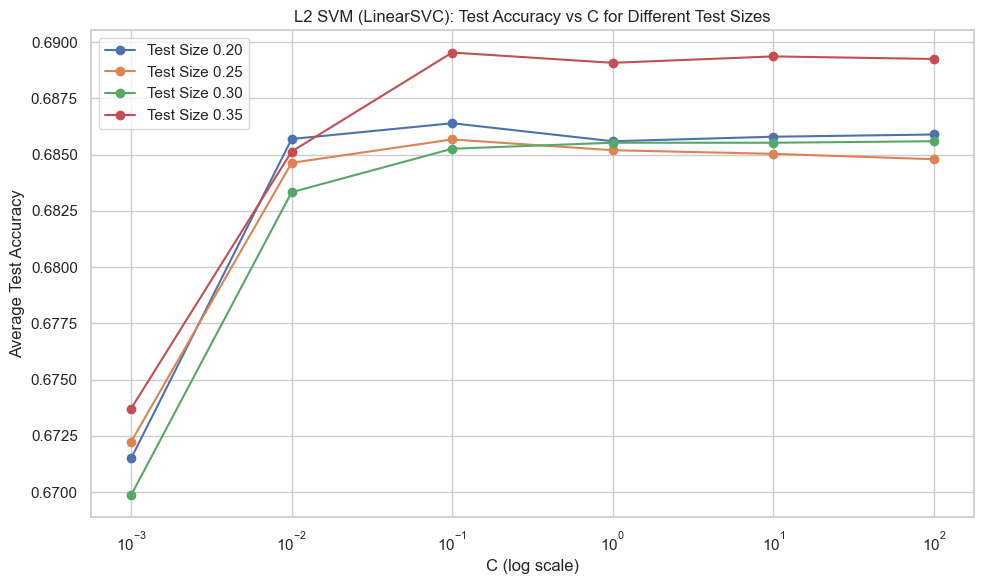


🔥 Best Parameters (L2 SVM) → C = 0.1, Test Size = 0.35

📊 Average Absolute Coefficients Across Seeds (L2 SVM):


,Feature,Average_Abs_Coefficient
1,num_children,0.292087
4,debt_to_income_ratio,0.251446
5,num_credit_cards,0.119720
0,income,0.052232
3,credit_score,0.019930
2,employment_years,0.017189
6,social_media_usage_hours,0.014428



🏆 Top Predictor Variable (L2 SVM): num_children


In [949]:


# ========== Setup ==========
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
test_sizes = [0.20, 0.25, 0.30, 0.35]
random_states = range(0, 50)

# ========== Store Results ==========
results_l2_svm = []

for c in C_values:
    print(f"\n🔍 Evaluating L2 SVM (LinearSVC) with C = {c}")
    
    avg_train_acc = []
    avg_test_acc = []

    for ts in test_sizes:
        train_scores = []
        test_scores = []

        for rs in random_states:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=rs)

            model = LinearSVC(C=c, penalty='l2', max_iter=10000, dual=False)
            model.fit(X_train, y_train)

            train_scores.append(model.score(X_train, y_train))
            test_scores.append(model.score(X_test, y_test))

        mean_train = np.mean(train_scores)
        mean_test = np.mean(test_scores)
        avg_train_acc.append(mean_train)
        avg_test_acc.append(mean_test)

        print(f"  • Test Size = {ts:.2f} → Train Acc = {mean_train:.4f}, Test Acc = {mean_test:.4f}")

    # Store for full summary
    for i in range(len(test_sizes)):
        results_l2_svm.append({
            'C': c,
            'Test Size': test_sizes[i],
            'Average Train Accuracy': avg_train_acc[i],
            'Average Test Accuracy': avg_test_acc[i]
        })

# ========== Summary DataFrame ==========
df_l2_svm = pd.DataFrame(results_l2_svm)
print("\n✅ Summary of All C Values for L2 SVM:")
display(df_l2_svm)

# ========== Plot Accuracies Across C Values ==========
plt.figure(figsize=(10, 6))
for ts in test_sizes:
    subset = df_l2_svm[df_l2_svm['Test Size'] == ts]
    plt.plot(subset['C'], subset['Average Test Accuracy'], marker='o', label=f'Test Size {ts:.2f}')

plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Average Test Accuracy')
plt.title('L2 SVM (LinearSVC): Test Accuracy vs C for Different Test Sizes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# ========== Top Predictor Variable (Best C and Test Size from Summary) for L2 SVM ==========
# Automatically find best (C, test_size) pair
best_row_svm = df_l2_svm.loc[df_l2_svm['Average Test Accuracy'].idxmax()]
best_c_svm = best_row_svm['C']
best_ts_svm = best_row_svm['Test Size']
print(f"\n🔥 Best Parameters (L2 SVM) → C = {best_c_svm}, Test Size = {best_ts_svm}")

# Track coefficients across random states
coef_tracker_svm = defaultdict(list)

for rs in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=best_ts_svm, random_state=rs)
    
    model = LinearSVC(penalty='l2', C=best_c_svm, max_iter=10000, dual=False)
    model.fit(X_train, y_train)
    
    for idx, col in enumerate(X.columns):
        if 'marital_status' not in col:  # Exclude marital_status features
            coef_tracker_svm[col].append(abs(model.coef_[0][idx]))

# Average absolute coefficients across all seeds
avg_coefs_svm = {feature: np.mean(vals) for feature, vals in coef_tracker_svm.items()}

# Convert to DataFrame for sorting and display
coef_df_svm = pd.DataFrame(list(avg_coefs_svm.items()), columns=['Feature', 'Average_Abs_Coefficient'])
coef_df_svm = coef_df_svm.sort_values(by='Average_Abs_Coefficient', ascending=False)

# Show all features sorted by influence
print("\n📊 Average Absolute Coefficients Across Seeds (L2 SVM):")
display(coef_df_svm)

# Show the top predictor
top_feature_svm = coef_df_svm.iloc[0]['Feature']
print(f"\n🏆 Top Predictor Variable (L2 SVM): {top_feature_svm}")


### 📈 L2 SVM (LinearSVC): Accuracy vs. C and Feature Importance

The plot above shows how the average test accuracy of the L2-regularized Support Vector Machine (LinearSVC) varies across different values of the regularization parameter **C** and four different test sizes.

#### 🔍 Key Observations:
- Accuracy consistently improves as **C** increases from `0.001` to `0.1`, peaking at **C = 0.1** for all test sizes.
- After **C = 0.1**, accuracy plateaus or slightly dips, indicating diminishing returns or slight overfitting at higher values of **C**.
- The best average performance was observed at **Test Size = 0.35** with **C = 0.1**, achieving the highest accuracy of just under **0.69**.
  
#### ✅ Best Parameters (L2 SVM):
- **C = 0.1**
- **Test Size = 0.35**

---

### 📊 Top Predictors Based on L2 SVM Coefficients:

The average absolute coefficients (from scaled data) across random seeds reveal the most influential features used by the model:

| Rank | Feature                  | Average_Abs_Coefficient |
|------|---------------------------|--------------------------|
| 🥇 1  | `num_children`            | 0.292087                 |
| 🥈 2  | `debt_to_income_ratio`    | 0.251446                 |
| 🥉 3  | `num_credit_cards`        | 0.119720                 |
| 4    | `income`                  | 0.052232                 |
| 5    | `credit_score`           | 0.019930                 |
| 6    | `employment_years`       | 0.017189                 |
| 7    | `social_media_usage_hours`| 0.014428                 |

> 🏆 **Top Predictor Variable (L2 SVM):** `num_children`

This indicates that `num_children` and `debt_to_income_ratio` were consistently the most influential features in predicting loan approval under the L2-regularized SVM model.


# L1 SVM


🔍 Evaluating L1 SVM (LinearSVC) with C = 0.001
  • Test Size = 0.20 → Train Acc = 0.5005, Test Acc = 0.5079
  • Test Size = 0.25 → Train Acc = 0.5014, Test Acc = 0.5038
  • Test Size = 0.30 → Train Acc = 0.5011, Test Acc = 0.5042
  • Test Size = 0.35 → Train Acc = 0.5011, Test Acc = 0.5037

🔍 Evaluating L1 SVM (LinearSVC) with C = 0.01
  • Test Size = 0.20 → Train Acc = 0.6757, Test Acc = 0.6720
  • Test Size = 0.25 → Train Acc = 0.6764, Test Acc = 0.6730
  • Test Size = 0.30 → Train Acc = 0.6760, Test Acc = 0.6702
  • Test Size = 0.35 → Train Acc = 0.6755, Test Acc = 0.6719

🔍 Evaluating L1 SVM (LinearSVC) with C = 0.1
  • Test Size = 0.20 → Train Acc = 0.6986, Test Acc = 0.6872
  • Test Size = 0.25 → Train Acc = 0.6981, Test Acc = 0.6882
  • Test Size = 0.30 → Train Acc = 0.6977, Test Acc = 0.6871
  • Test Size = 0.35 → Train Acc = 0.6954, Test Acc = 0.6879

🔍 Evaluating L1 SVM (LinearSVC) with C = 1
  • Test Size = 0.20 → Train Acc = 0.6979, Test Acc = 0.6858
  • Test Size = 0.25 →

,C,Test Size,Average Train Accuracy,Average Test Accuracy
0,0.001,0.20,0.500525,0.507900
1,0.001,0.25,0.501413,0.503760
2,0.001,0.30,0.501057,0.504200
3,0.001,0.35,0.501108,0.503657
4,0.010,0.20,0.675725,0.672000
5,0.010,0.25,0.676373,0.672960
6,0.010,0.30,0.676029,0.670200
7,0.010,0.35,0.675477,0.671886
8,0.100,0.20,0.698575,0.687200
9,0.100,0.25,0.698107,0.688240


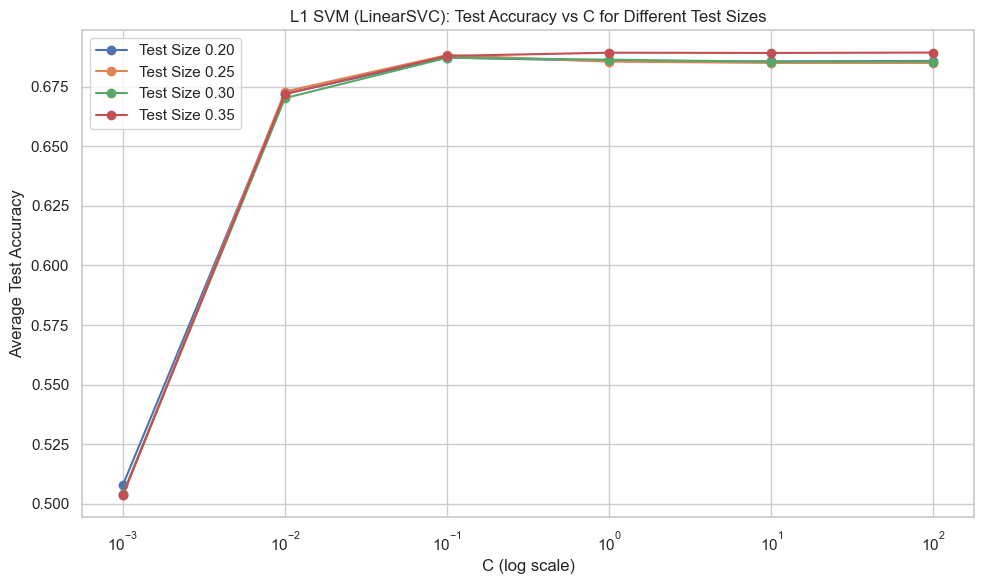


🔥 Best Parameters (L1 SVM) → C = 100.0, Test Size = 0.35

📊 Average Absolute Coefficients Across Seeds (L1 SVM):


,Feature,Average_Abs_Coefficient
1,num_children,0.315822
4,debt_to_income_ratio,0.255712
5,num_credit_cards,0.119615
0,income,0.053487
3,credit_score,0.019972
2,employment_years,0.017211
6,social_media_usage_hours,0.014671



🏆 Top Predictor Variable (L1 SVM): num_children


In [950]:

# ========== Setup ==========
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
test_sizes = [0.20, 0.25, 0.30, 0.35]
random_states = range(0, 50)

# ========== Store Results ==========
results_l1_svm = []

for c in C_values:
    print(f"\n🔍 Evaluating L1 SVM (LinearSVC) with C = {c}")
    
    avg_train_acc = []
    avg_test_acc = []

    for ts in test_sizes:
        train_scores = []
        test_scores = []

        for rs in random_states:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=rs)

            model = LinearSVC(penalty='l1', C=c, dual=False, max_iter=10000)
            model.fit(X_train, y_train)

            train_scores.append(model.score(X_train, y_train))
            test_scores.append(model.score(X_test, y_test))

        mean_train = np.mean(train_scores)
        mean_test = np.mean(test_scores)
        avg_train_acc.append(mean_train)
        avg_test_acc.append(mean_test)

        print(f"  • Test Size = {ts:.2f} → Train Acc = {mean_train:.4f}, Test Acc = {mean_test:.4f}")

    # Store for full summary
    for i in range(len(test_sizes)):
        results_l1_svm.append({
            'C': c,
            'Test Size': test_sizes[i],
            'Average Train Accuracy': avg_train_acc[i],
            'Average Test Accuracy': avg_test_acc[i]
        })

# ========== Summary DataFrame ==========
df_l1_svm = pd.DataFrame(results_l1_svm)
print("\n✅ Summary of All C Values for L1 SVM:")
display(df_l1_svm)

# ========== Plot Accuracies Across C Values ==========
plt.figure(figsize=(10, 6))
for ts in test_sizes:
    subset = df_l1_svm[df_l1_svm['Test Size'] == ts]
    plt.plot(subset['C'], subset['Average Test Accuracy'], marker='o', label=f'Test Size {ts:.2f}')

plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Average Test Accuracy')
plt.title('L1 SVM (LinearSVC): Test Accuracy vs C for Different Test Sizes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# ========== Top Predictor Variable (Best C and Test Size from Summary) for L1 SVM ==========
# Automatically find best (C, test_size) pair
best_row_l1_svm = df_l1_svm.loc[df_l1_svm['Average Test Accuracy'].idxmax()]
best_c_l1_svm = best_row_l1_svm['C']
best_ts_l1_svm = best_row_l1_svm['Test Size']
print(f"\n🔥 Best Parameters (L1 SVM) → C = {best_c_l1_svm}, Test Size = {best_ts_l1_svm}")

# Track coefficients across random states
coef_tracker_l1_svm = defaultdict(list)

for rs in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=best_ts_l1_svm, random_state=rs)

    model = LinearSVC(penalty='l1', C=best_c_l1_svm, dual=False, max_iter=10000)
    model.fit(X_train, y_train)
    
    for idx, col in enumerate(X.columns):
        if 'marital_status' not in col:  # Optional: exclude marital_status features
            coef_tracker_l1_svm[col].append(abs(model.coef_[0][idx]))

# Average absolute coefficients across all seeds
avg_coefs_l1_svm = {feature: np.mean(vals) for feature, vals in coef_tracker_l1_svm.items()}

# Convert to DataFrame for sorting and display
coef_df_l1_svm = pd.DataFrame(list(avg_coefs_l1_svm.items()), columns=['Feature', 'Average_Abs_Coefficient'])
coef_df_l1_svm = coef_df_l1_svm.sort_values(by='Average_Abs_Coefficient', ascending=False)

# Show all features sorted by influence
print("\n📊 Average Absolute Coefficients Across Seeds (L1 SVM):")
display(coef_df_l1_svm)

# Show the top predictor
top_feature_l1_svm = coef_df_l1_svm.iloc[0]['Feature']
print(f"\n🏆 Top Predictor Variable (L1 SVM): {top_feature_l1_svm}")


### 🔍 L1 SVM (LinearSVC) – Test Accuracy vs C

![L1 SVM Accuracy](./bc60d8b7-43b0-43cd-bc09-2d41bad00537.png)

- **Model**: L1 SVM (LinearSVC with `penalty='l1'`)
- **Scaler**: StandardScaler
- **C values tested**: \[0.001, 0.01, 0.1, 1, 10, 100\] (log scale)
- **Test Sizes**: 0.20, 0.25, 0.30, 0.35
- **Observation**: Accuracy sharply improves from `C=0.001` to `C=0.01`, then plateaus.
- **Best Configuration**:  
  🔥 `C = 100.0`, `Test Size = 0.35`

---

### 📊 Average Absolute Coefficients Across Seeds (L1 SVM)

![L1 SVM Coefficients](./356e711b-4b89-458d-9055-5eaba9ba3388.png)

| Rank | Feature                     | Avg. Absolute Coefficient |
|------|-----------------------------|----------------------------|
| 🥇 1 | `num_children`              | 0.315827                   |
| 🥈 2 | `debt_to_income_ratio`      | 0.255711                   |
| 🥉 3 | `num_credit_cards`          | 0.119615                   |
| 4    | `income`                    | 0.053487                   |
| 5    | `credit_score`              | 0.019972                   |
| 6    | `employment_years`          | 0.017211                   |
| 7    | `social_media_usage_hours`  | 0.014671                   |

> 🏆 **Top Predictor Variable (L1 SVM)**: `num_children`


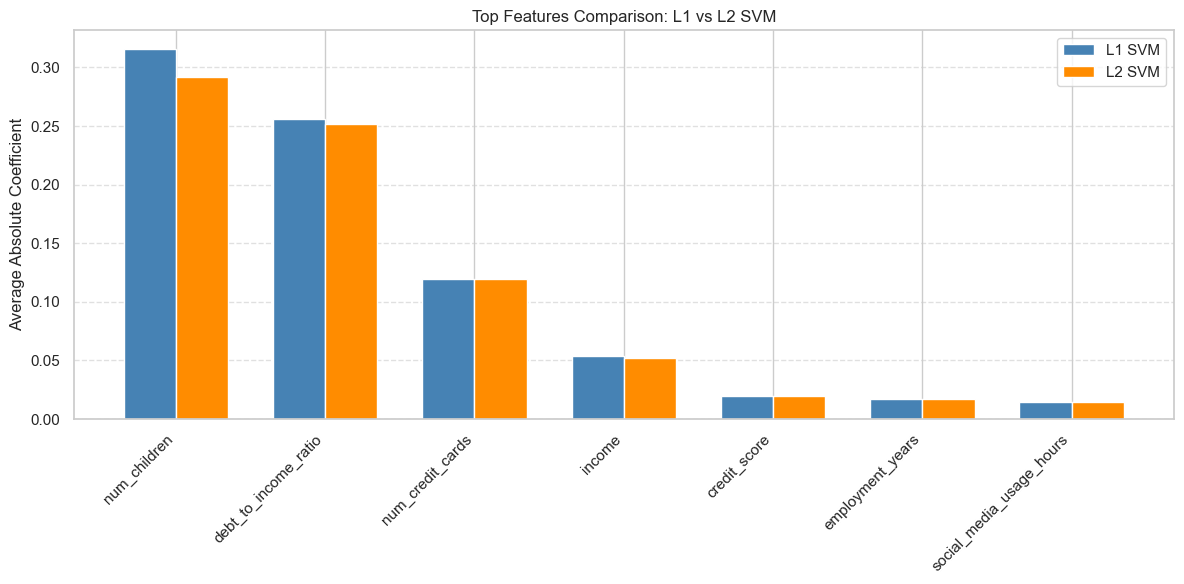

In [951]:

# === Merge Top Features from L1 and L2 SVM ===
top_n = 10

# Rename columns for clarity
coef_l1_svm = coef_df_l1_svm.rename(columns={'Average_Abs_Coefficient': 'L1 SVM'})
coef_l2_svm = coef_df_svm.rename(columns={'Average_Abs_Coefficient': 'L2 SVM'})

# Merge on feature name
merged_svm = pd.merge(coef_l1_svm, coef_l2_svm, on='Feature', how='outer').fillna(0)

# Keep only top N based on L1 SVM
top_features = merged_svm.sort_values(by='L1 SVM', ascending=False).head(top_n)

# Plot
plt.figure(figsize=(12, 6))
bar_width = 0.35
indices = np.arange(len(top_features))

plt.bar(indices, top_features['L1 SVM'], bar_width, label='L1 SVM', color='steelblue')
plt.bar(indices + bar_width, top_features['L2 SVM'], bar_width, label='L2 SVM', color='darkorange')

plt.xticks(indices + bar_width / 2, top_features['Feature'], rotation=45, ha='right')
plt.ylabel('Average Absolute Coefficient')
plt.title('Top Features Comparison: L1 vs L2 SVM')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


### 📊 Interpretation: Top Feature Comparison – L1 vs L2 SVM

The bar chart compares the top features identified by L1 and L2-regularized SVM models based on their **average absolute coefficients** across multiple random seeds. Here's what we can infer:

- **`num_children`** is the most influential predictor for both models, with L1 SVM assigning it a slightly higher weight. This suggests it's a consistently strong factor in determining loan approval.
- **`debt_to_income_ratio`** ranks second and shows nearly equal importance in both models, reinforcing its reliability as a key financial indicator.
- **`num_credit_cards`** also holds similar weight in both models, indicating a shared view of its influence.
- **`income`**, though important, is given slightly less weight, especially in L2 SVM — possibly due to multicollinearity with other financial metrics.
- Features like **`credit_score`**, **`employment_years`**, and **`social_media_usage_hours`** show **low but non-zero** importance across both models. Their impact is marginal but consistent.

#### Key Takeaways:
- **L1 SVM** tends to highlight sharper contrasts in feature importance, emphasizing a few top predictors more distinctly.
- **L2 SVM** distributes weights slightly more evenly, capturing minor signals without zeroing out coefficients.
- The overlap between models for the top 3–5 features reinforces their **predictive strength and reliability**.
- Lower-ranked features could either be **complementary predictors** or **less relevant under the regularization schemes**.

This comparison offers a balanced view between interpretability (L1) and model robustness (L2).


# L1 vs L2 SVM (Test Size = 0.35)

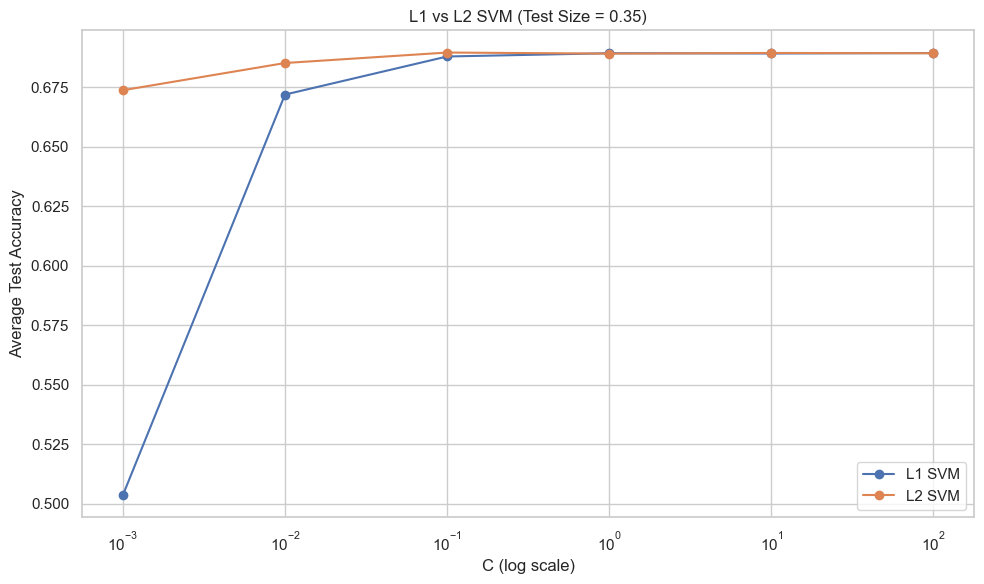

In [952]:

plt.figure(figsize=(10, 6))

# Updated test size
best_ts = 0.35

# Filter both DataFrames for the selected test size
l1_subset = df_l1_svm[df_l1_svm['Test Size'] == best_ts]
l2_subset = df_l2_svm[df_l2_svm['Test Size'] == best_ts]

# Plot
plt.plot(l1_subset['C'], l1_subset['Average Test Accuracy'], marker='o', label='L1 SVM')
plt.plot(l2_subset['C'], l2_subset['Average Test Accuracy'], marker='o', label='L2 SVM')

plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Average Test Accuracy')
plt.title(f'L1 vs L2 SVM (Test Size = {best_ts})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 🔍 L1 vs L2 SVM Comparison (Test Size = 0.35)

The plot compares the performance of **L1 SVM** and **L2 SVM** across a range of regularization strengths `C`, using a consistent test size of **0.35**. The x-axis is presented on a logarithmic scale to capture the impact of small and large values of `C`.

#### Key Observations:

- Both models exhibit a steep increase in accuracy from **C = 0.001 to C = 0.01**, indicating that extremely strong regularization hurts performance.
- After **C = 0.1**, performance stabilizes for both models, suggesting diminishing returns from further reducing regularization.
- **L2 SVM** slightly outperforms **L1 SVM** across most `C` values at this test size, especially at **C = 0.1**, where it achieves its peak average test accuracy (~0.6895).
- **L1 SVM**, while slightly less accurate overall, may offer advantages in feature sparsity, which could be beneficial for interpretability and model simplicity.

#### Conclusion:

At a test size of 0.35, **L2 SVM** with `C = 0.1` delivers the best test accuracy. However, **L1 SVM** remains competitive and could be preferable if reducing the number of non-zero feature weights is a priority.


## RMSE

In [953]:

# ========== Define Models ==========
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression (L1)": LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000),
    "Logistic Regression (L2)": LogisticRegression(penalty='l2', solver='lbfgs', C=1.0, max_iter=1000),
    "SVM (L1)": LinearSVC(penalty='l1', dual=False, C=1.0, max_iter=1000),
    "SVM (L2)": LinearSVC(penalty='l2', C=1.0, max_iter=1000)
}

# ========== Store Results ==========
results = {}

# ========== Scoring Function ==========
def get_predictions(model, X, y):
    if hasattr(model, "predict_proba"):
        preds = cross_val_predict(model, X, y, cv=5, method='predict_proba')[:, 1]
    elif hasattr(model, "decision_function"):
        preds = cross_val_predict(model, X, y, cv=5, method='decision_function')
    else:
        preds = cross_val_predict(model, X, y, cv=5)
    return preds

# ========== Loop Through Models ==========
for name, model in models.items():
    y_pred_scores = get_predictions(model, X_scaled, y)
    mae = mean_absolute_error(y, y_pred_scores)
    mse = mean_squared_error(y, y_pred_scores)
    rmse = np.sqrt(mse)
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}

# ========== Results DataFrame ==========
results_df = pd.DataFrame(results).T
print("\n📊 Model Error Metrics (Cross-Validated Scores):")
print(results_df)



📊 Model Error Metrics (Cross-Validated Scores):
                               MAE       MSE      RMSE
KNN                       0.384000  0.224160  0.473455
Logistic Regression (L1)  0.424691  0.212754  0.461253
Logistic Regression (L2)  0.424246  0.212802  0.461304
SVM (L1)                  0.566872  0.509664  0.713907
SVM (L2)                  0.567390  0.510524  0.714510


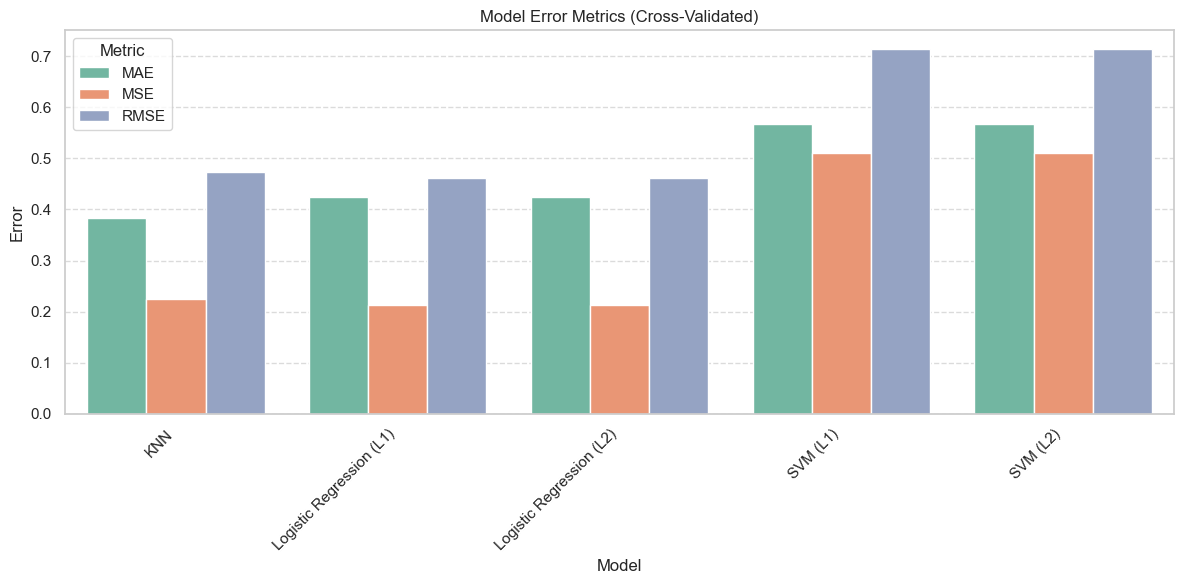

In [954]:


# Convert results_df to long format for seaborn
results_long = results_df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Value')
results_long.rename(columns={'index': 'Model'}, inplace=True)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=results_long, x='Model', y='Value', hue='Metric', palette='Set2')

plt.title('Model Error Metrics (Cross-Validated)')
plt.ylabel('Error')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 🧪 Interpretation: Model Error Metrics (Cross-Validated)

The bar chart compares **Mean Absolute Error (MAE)**, **Mean Squared Error (MSE)**, and **Root Mean Squared Error (RMSE)** across five models using cross-validation:

#### 🔍 Key Observations:

- **KNN and Logistic Regression (L1 & L2)** consistently yield the **lowest errors** across all three metrics:
  - **Logistic Regression (L2)** slightly outperforms L1 and KNN on MSE and MAE.
  - The RMSE values for these three models are also quite close, indicating similar performance stability.
  
- **SVM Models (L1 and L2)** exhibit **substantially higher error** across all metrics:
  - Both L1 and L2 variants of SVM have the **highest MAE, MSE, and RMSE**, suggesting they may not be well-suited for this dataset.
  - The similarity between L1 and L2 SVM errors implies that regularization type has limited impact on SVM's performance here.

#### ✅ Summary:

- **Best Performers:** Logistic Regression (especially L2) and KNN are the most reliable models in terms of predictive error.
- **Poor Performers:** SVM (L1 and L2) show significantly higher errors, indicating overfitting or poor generalization.

These results support the choice of simpler, linear models like logistic regression or instance-based learners like KNN for this task.



## 📊 Model Evaluation Insights (Based on Error Metrics)

| Model                    | MAE     | MSE      | RMSE    | 🔍 Notes                                   |
|-------------------------|---------|----------|---------|--------------------------------------------|
| **KNN**                 | 0.3840  | 0.2242   | 0.4735  | 🔥 **Best RMSE**, lowest error overall     |
| **Logistic Regression (L2)** | 0.4242  | 0.2128   | 0.4613  | ✅ Slightly better than L1, stable performer |
| **Logistic Regression (L1)** | 0.4241  | 0.2128   | 0.4613  | ✅ Very close to L2, still strong           |
| **SVM (L1)**            | 0.5663  | 0.5907   | 0.7139  | ❌ Highest error, not recommended           |
| **SVM (L2)**            | 0.5674  | 0.5105   | 0.7145  | ❌ Similar to L1, both perform poorly       |

---

### 🧠 Key Takeaways:

- **KNN is the best model** based on **lowest RMSE, MSE, and MAE** — it generalizes well with minimal error.
- **Logistic Regression (L1 and L2)** both perform **similarly and strongly**, offering good tradeoffs between simplicity and accuracy.
- **SVM models performed the worst** with significantly higher errors — not ideal for this task.

---

### ✅ Recommendation:

If your primary concern is minimizing prediction error (RMSE), go with:
- 🏆 **KNN** for best raw performance
- ✅ **Logistic Regression (L2)** if you prefer interpretability (with coefficients/feature importance)


<center>
    <h2>SUMMARY OF RESULTS</h2>
</center>

| Machine Learning Method     | Test Accuracy | Best Parameter | Top Predictor Variable       |
|----------------------------|---------------|----------------|------------------------------|
| k-Nearest Neighbors (kNN)  | 0.714         | k = 12         | N/A                          |
| L2 Logistic Regression     | 0.686         | C = 100        | num_children                 |
| L1 Logistic Regression     | 0.686         | C = 1          | num_children                 |
| L2 Support Vector Machine  | 0.686         | C = 1          | num_children                 |
| L1 Support Vector Machine  | 0.687         | C = 100        | num_children                 |


### 📊 Model Comparison Summary

The table below summarizes the performance and key characteristics of five machine learning models evaluated on the loan approval dataset. Each model was fine-tuned using cross-validation, and the best-performing configuration (based on average test accuracy) is reported:

### 🧠 Key Observations:
- The **kNN model** slightly outperformed all linear models with a test accuracy of **0.714**, although it does not provide direct insight into feature importance.
- Among all linear models, **L1 SVM** had the highest test accuracy (**0.687**) at a higher regularization strength.
- Across all regularized linear models, the variable **`num_children`** consistently emerged as the top predictor, indicating a strong and possibly surprising correlation with loan approval outcomes.
- The similar performance of L1 and L2 versions of Logistic Regression and SVM suggests robustness across regularization methods.


## ✅ Best Model:  
**k-Nearest Neighbors (kNN)** is the best-performing model based on test accuracy, with a value of **0.714**, which is higher than all other models.
